In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(42)

# Question # 01

### Task # 01

In [75]:
class Perceptron:
    def __init__(self, learning_rate=0.1, max_iter=100):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.weights = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        # Initialize weights randomly
        self.weights = np.random.uniform(-0.5, 0.5, n_features + 1)
        
        # Add bias column
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        for epoch in range(self.max_iter):
            errors = 0
            for i in range(len(X)):
                # Calculate output
                z = np.dot(X_bias[i], self.weights)
                prediction = 1 if z >= 0 else 0
                
                # Update weights if wrong
                error = y[i] - prediction
                if error != 0:
                    self.weights += self.lr * error * X_bias[i] 
                    errors += 1
            
            if errors == 0:
                print(f"Converged in {epoch+1} iterations")
                break
        
        return self
    
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return np.where(np.dot(X_bias, self.weights) >= 0, 1, 0)

In [76]:
# Training data for logic gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Truth tables
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1]) 
y_nand = np.array([1, 1, 1, 0])
y_nor = np.array([1, 0, 0, 0])

print("Training data:")
print("X =", X)
print("AND:", y_and)
print("OR:", y_or)
print("NAND:", y_nand)
print("NOR:", y_nor)

Training data:
X = [[0 0]
 [0 1]
 [1 0]
 [1 1]]
AND: [0 0 0 1]
OR: [0 1 1 1]
NAND: [1 1 1 0]
NOR: [1 0 0 0]


In [77]:
# Function to plot decision boundary
def plot_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    
    # Create mesh for decision boundary
    h = 0.01
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get predictions for mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
    
    # Plot data points
    colors = ['red', 'blue']
    for i in [0, 1]:
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=100, 
                   label=f'Class {i}', edgecolors='black')
    
    # Add labels to points with reduced precision
    for i in range(len(X)):
        plt.annotate(f'({X[i,0]:.1f},{X[i,1]:.1f})', (X[i,0], X[i,1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'{title} Gate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Training AND Gate...
Converged in 4 iterations


Training AND Gate...
Converged in 4 iterations


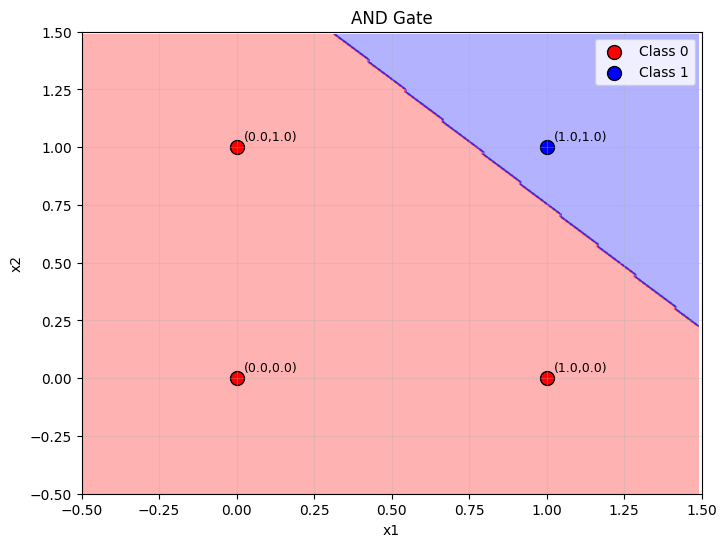

AND Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 0, Predicted: 0
Input: [1 0] -> Expected: 0, Predicted: 0
Input: [1 1] -> Expected: 1, Predicted: 1
Weights: [-0.42545988  0.25071431  0.23199394]


In [78]:
# AND Gate
print("Training AND Gate...")
and_model = Perceptron()
and_model.fit(X, y_and)

plot_boundary(X, y_and, and_model, "AND")

# Test the model
predictions = and_model.predict(X)
print("AND Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_and[i]}, Predicted: {predictions[i]}")

print(f"Weights: {and_model.weights}")

Training OR Gate...
Converged in 8 iterations


Training OR Gate...
Converged in 8 iterations


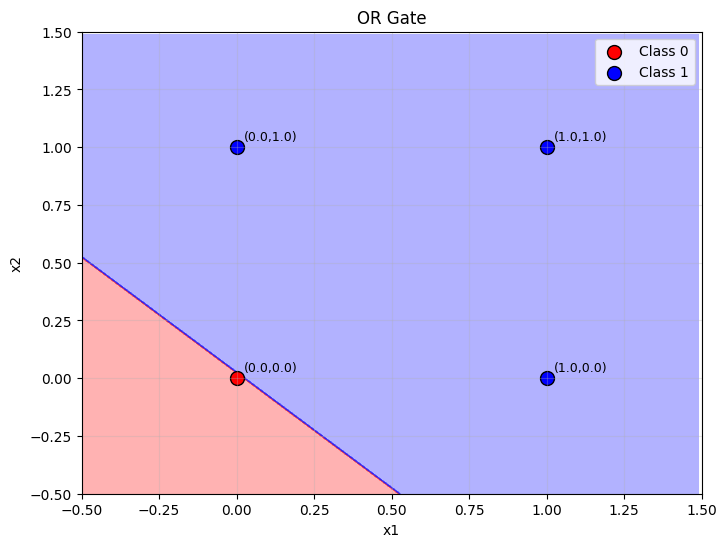

OR Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 1, Predicted: 1
Weights: [-0.00134152  0.05601864  0.05599452]


In [79]:
# OR Gate
print("Training OR Gate...")
or_model = Perceptron()
or_model.fit(X, y_or)

plot_boundary(X, y_or, or_model, "OR")

predictions = or_model.predict(X)
print("OR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_or[i]}, Predicted: {predictions[i]}")

print(f"Weights: {or_model.weights}")

Training NAND Gate...
Converged in 11 iterations


Training NAND Gate...
Converged in 11 iterations


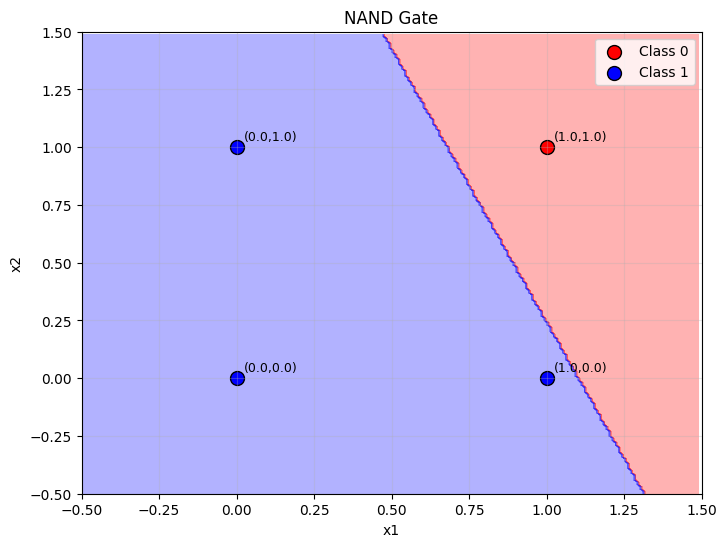

NAND Gate Results:
Input: [0 0] -> Expected: 1, Predicted: 1
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 0, Predicted: 0
Weights: [ 0.25808361 -0.23382385 -0.09888499]


In [80]:
# NAND Gate
print("Training NAND Gate...")
nand_model = Perceptron()
nand_model.fit(X, y_nand)

plot_boundary(X, y_nand, nand_model, "NAND")

predictions = nand_model.predict(X)
print("NAND Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_nand[i]}, Predicted: {predictions[i]}")

print(f"Weights: {nand_model.weights}")

Training NOR Gate...
Converged in 7 iterations


Training NOR Gate...
Converged in 7 iterations


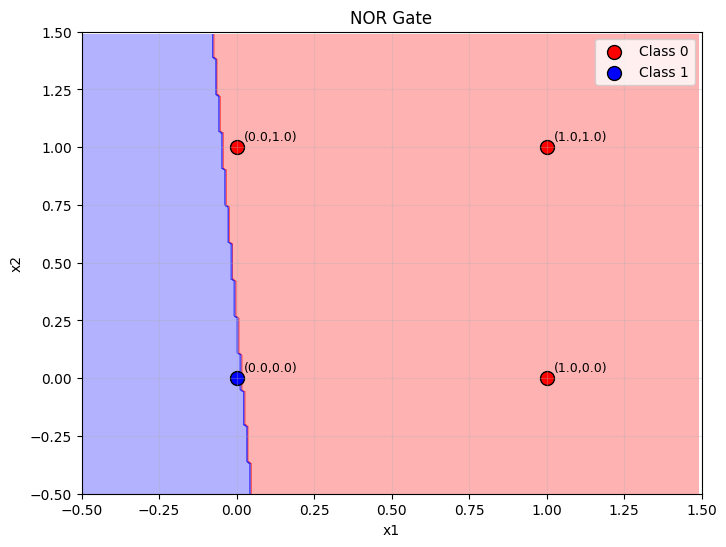

NOR Gate Results:
Input: [0 0] -> Expected: 1, Predicted: 1
Input: [0 1] -> Expected: 0, Predicted: 0
Input: [1 0] -> Expected: 0, Predicted: 0
Input: [1 1] -> Expected: 0, Predicted: 0
Weights: [ 0.00807258 -0.47941551 -0.03009015]


In [81]:
# NOR Gate  
print("Training NOR Gate...")
nor_model = Perceptron()
nor_model.fit(X, y_nor)

plot_boundary(X, y_nor, nor_model, "NOR")

predictions = nor_model.predict(X)
print("NOR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_nor[i]}, Predicted: {predictions[i]}")

print(f"Weights: {nor_model.weights}")

### Task # 02

In [82]:
# XOR gate using combination of perceptrons
# XOR = (A OR B) AND NOT(A AND B) = (A OR B) AND (A NAND B)

class XORPerceptron:
    def __init__(self):
        self.or_gate = None
        self.nand_gate = None
        self.and_gate = None
        
    def fit(self, X, y):
        # XOR truth table
        y_xor = np.array([0, 1, 1, 0])
        
        # Train OR gate (first layer)
        self.or_gate = Perceptron()
        self.or_gate.fit(X, y_or)
        
        # Train NAND gate (first layer) 
        self.nand_gate = Perceptron()
        self.nand_gate.fit(X, y_nand)
        
        # Create inputs for second layer (outputs of OR and NAND)
        or_outputs = self.or_gate.predict(X)
        nand_outputs = self.nand_gate.predict(X)
        layer2_inputs = np.column_stack([or_outputs, nand_outputs])
        
        # Train AND gate for second layer
        self.and_gate = Perceptron()
        self.and_gate.fit(layer2_inputs, y_xor)
        
        print("XOR network trained successfully!")
        
    def predict(self, X):
        # Get outputs from first layer
        or_outputs = self.or_gate.predict(X)
        nand_outputs = self.nand_gate.predict(X)
        
        # Combine outputs for second layer
        layer2_inputs = np.column_stack([or_outputs, nand_outputs])
        
        # Final prediction from AND gate
        return self.and_gate.predict(layer2_inputs)

# XOR truth table
y_xor = np.array([0, 1, 1, 0])
print("XOR truth table:", y_xor)

XOR truth table: [0 1 1 0]


In [83]:
# Train XOR gate
print("Training XOR Gate...")
xor_model = XORPerceptron()
xor_model.fit(X, y_xor)

# Test the XOR model
predictions = xor_model.predict(X)
print("XOR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_xor[i]}, Predicted: {predictions[i]}")

# Check accuracy
accuracy = np.mean(predictions == y_xor) * 100
print(f"XOR Accuracy: {accuracy:.1f}%")

Training XOR Gate...
Converged in 11 iterations
Converged in 7 iterations
Converged in 6 iterations
XOR network trained successfully!
XOR Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 0, Predicted: 0
XOR Accuracy: 100.0%


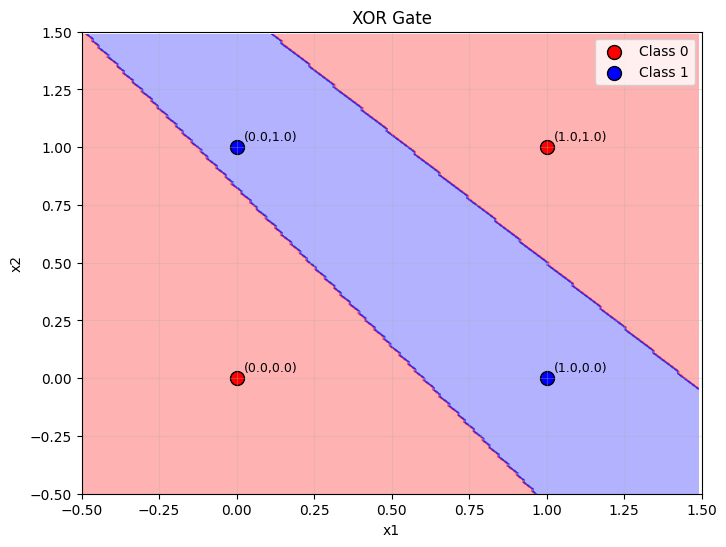


Intermediate gate outputs:
Input | OR | NAND | XOR
-------------------------
[0 0] | 0  |  1   | 0
[0 1] | 1  |  1   | 1
[1 0] | 1  |  1   | 1
[1 1] | 1  |  0   | 0

XOR = (A OR B) AND (A NAND B)


In [84]:
# Plot XOR decision boundary (similar to other gates)
plot_boundary(X, y_xor, xor_model, "XOR")

# Show the intermediate outputs
print("\nIntermediate gate outputs:")
or_out = xor_model.or_gate.predict(X)
nand_out = xor_model.nand_gate.predict(X)

print("Input | OR | NAND | XOR")
print("-" * 25)
for i in range(len(X)):
    print(f"{X[i]} | {or_out[i]}  |  {nand_out[i]}   | {predictions[i]}")

print(f"\nXOR = (A OR B) AND (A NAND B)")

In [85]:
# Compare: Single perceptron vs Multi-layer for XOR
print("Trying single perceptron on XOR:")
single_xor = Perceptron()
single_xor.fit(X, y_xor)

single_pred = single_xor.predict(X)
print("Single perceptron XOR results:")
for i in range(len(X)):
    print(f"{X[i]} -> {single_pred[i]} (expected {y_xor[i]})")

accuracy = np.mean(single_pred == y_xor) * 100
print(f"Accuracy: {accuracy}%")
print("Single perceptron can't solve XOR!")

Trying single perceptron on XOR:
Single perceptron XOR results:
[0 0] -> 1 (expected 0)
[0 1] -> 1 (expected 1)
[1 0] -> 0 (expected 1)
[1 1] -> 0 (expected 0)
Accuracy: 50.0%
Single perceptron can't solve XOR!


### Task # 03

In [86]:
# Task 3: BMI classification dataset
height = np.array([165, 170, 180, 160, 175, 155, 185, 162, 178, 168])
weight = np.array([55, 65, 85, 50, 70, 45, 95, 58, 88, 75])
X_health = np.column_stack([height, weight])

# BMI-based labels: 1=healthy (<25), -1=overweight (>=25)
bmi = weight / (height/100)**2
y_health = np.where(bmi < 25, 1, -1)

print("Health Classification Data:")
print("Person | Height(cm) | Weight(kg) | BMI  | Label")
print("-" * 45)
for i in range(len(height)):
    status = "Healthy" if y_health[i] == 1 else "Overweight"
    print(f"  {i+1:2d}   |    {height[i]:3d}     |    {weight[i]:2d}     |{bmi[i]:5.1f} | {y_health[i]:2d} ({status})")

print(f"\nFeatures: {X_health.shape}, Labels: {y_health}")

Health Classification Data:
Person | Height(cm) | Weight(kg) | BMI  | Label
---------------------------------------------
   1   |    165     |    55     | 20.2 |  1 (Healthy)
   2   |    170     |    65     | 22.5 |  1 (Healthy)
   3   |    180     |    85     | 26.2 | -1 (Overweight)
   4   |    160     |    50     | 19.5 |  1 (Healthy)
   5   |    175     |    70     | 22.9 |  1 (Healthy)
   6   |    155     |    45     | 18.7 |  1 (Healthy)
   7   |    185     |    95     | 27.8 | -1 (Overweight)
   8   |    162     |    58     | 22.1 |  1 (Healthy)
   9   |    178     |    88     | 27.8 | -1 (Overweight)
  10   |    168     |    75     | 26.6 | -1 (Overweight)

Features shape: (10, 2)
Labels: [ 1  1 -1  1  1  1 -1  1 -1 -1]


In [87]:
# Convert to binary labels for Perceptron (1=healthy, 0=overweight)
y_health_binary = np.where(y_health == 1, 1, 0)

health_model = Perceptron(learning_rate=0.01, max_iter=1000)
health_model.fit(X_health, y_health_binary)

predictions = health_model.predict(X_health)
accuracy = np.mean(predictions == y_health_binary) * 100

print(f"Training accuracy: {accuracy:.1f}%")
for i in range(len(X_health)):
    status_pred = "Healthy" if predictions[i] == 1 else "Overweight"
    status_actual = "Healthy" if y_health_binary[i] == 1 else "Overweight"
    correct = "✓" if predictions[i] == y_health_binary[i] else "✗"
    print(f"Person {i+1}: {X_health[i]} -> {status_pred} (actual: {status_actual}) {correct}")

Converting labels for existing Perceptron class:
Original labels (1=healthy, -1=overweight): [ 1  1 -1  1  1  1 -1  1 -1 -1]
Binary labels (1=healthy, 0=overweight): [1 1 0 1 1 1 0 1 0 0]

Training Health Classifier using existing Perceptron...
Converged in 8 iterations

Health Classification Results:
Person 1: [165  55] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 2: [170  65] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 3: [180  85] -> Predicted: 0 (Overweight), Actual: 0 (Overweight) ✓
Person 4: [160  50] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 5: [175  70] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 6: [155  45] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 7: [185  95] -> Predicted: 0 (Overweight), Actual: 0 (Overweight) ✓
Person 8: [162  58] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 9: [178  88] -> Predicted: 0 (Overweight), Actual: 0 (Overweight) ✓
Person 10: [168  75] -> Predicted: 0 (Overweight), Actual:

Scaled health data for plotting:
Original range - Height: 155 to 185
Original range - Weight: 45 to 95
Scaled to [0,1] range for consistent plotting
Converged in 5 iterations


Scaled health data for plotting:
Original range - Height: 155 to 185
Original range - Weight: 45 to 95
Scaled to [0,1] range for consistent plotting
Converged in 5 iterations


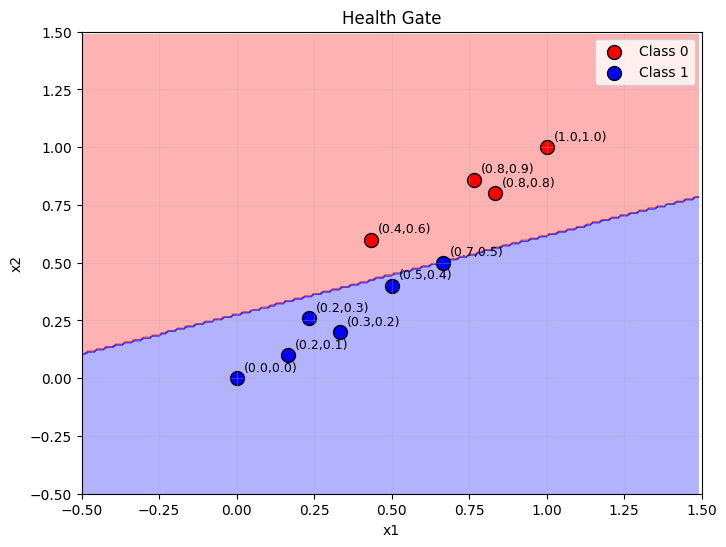


Data point mapping:
P1: Height=165cm, Weight=55kg -> (0.3, 0.2) [Healthy]
P2: Height=170cm, Weight=65kg -> (0.5, 0.4) [Healthy]
P3: Height=180cm, Weight=85kg -> (0.8, 0.8) [Overweight]
P4: Height=160cm, Weight=50kg -> (0.2, 0.1) [Healthy]
P5: Height=175cm, Weight=70kg -> (0.7, 0.5) [Healthy]
P6: Height=155cm, Weight=45kg -> (0.0, 0.0) [Healthy]
P7: Height=185cm, Weight=95kg -> (1.0, 1.0) [Overweight]
P8: Height=162cm, Weight=58kg -> (0.2, 0.3) [Healthy]
P9: Height=178cm, Weight=88kg -> (0.8, 0.9) [Overweight]
P10: Height=168cm, Weight=75kg -> (0.4, 0.6) [Overweight]

Testing with new data points:
Height: 172cm, Weight: 80kg, BMI: 27.0 -> Overweight
Height: 150cm, Weight: 40kg, BMI: 17.8 -> Healthy
Height: 190cm, Weight: 100kg, BMI: 27.7 -> Overweight

Original model weights: [-0.01393002  1.97517596 -4.85032622]


In [88]:
# Scale data and plot decision boundary
X_scaled = (X_health - X_health.min(axis=0)) / (X_health.max(axis=0) - X_health.min(axis=0))
health_scaled_model = Perceptron(learning_rate=0.01, max_iter=1000)
health_scaled_model.fit(X_scaled, y_health_binary)
plot_boundary(X_scaled, y_health_binary, health_scaled_model, "Health")

# Test new examples
test_X = np.column_stack([[172, 150, 190], [80, 40, 100]])
test_pred = health_model.predict(test_X)
for (h, w), p in zip(test_X, test_pred):
    bmi_test = w / (h/100)**2
    status = "Healthy" if p == 1 else "Overweight"
    print(f"Test: {h}cm, {w}kg, BMI={bmi_test:.1f} -> {status}")

print(f"Weights: {health_model.weights}")

### Task # 04

In [94]:
# Create sample weather data for classification
# Features: humidity (%), atmospheric pressure (hPa)
# Labels: 1 = rainy, -1 = non-rainy

# Sample weather data for 12 days
humidity = np.array([85, 45, 90, 30, 75, 40, 95, 35, 80, 50, 88, 25])  # %
pressure = np.array([1010, 1025, 1005, 1030, 1012, 1028, 1000, 1032, 1008, 1026, 1002, 1035])  # hPa

# Create feature matrix
X_weather = np.column_stack([humidity, pressure])

# Simple rule: High humidity (>70%) AND Low pressure (<1015 hPa) = Rainy
# Otherwise = Non-rainy
weather_labels = []
for i in range(len(humidity)):
    if humidity[i] > 70 and pressure[i] < 1015:
        weather_labels.append(1)   # rainy
    else:
        weather_labels.append(-1)  # non-rainy

y_weather = np.array(weather_labels)

print("Weather Classification Data:")
print("Day | Humidity(%) | Pressure(hPa) | Weather")
print("-" * 40)
for i in range(len(humidity)):
    weather = "Rainy" if y_weather[i] == 1 else "Non-rainy"
    print(f" {i+1:2d} |     {humidity[i]:2d}     |     {pressure[i]:4d}     | {weather}")

print(f"\nFeatures shape: {X_weather.shape}")
print(f"Labels: {y_weather}")

Weather Classification Data:
Day | Humidity(%) | Pressure(hPa) | Weather
----------------------------------------
  1 |     85     |     1010     | Rainy
  2 |     45     |     1025     | Non-rainy
  3 |     90     |     1005     | Rainy
  4 |     30     |     1030     | Non-rainy
  5 |     75     |     1012     | Rainy
  6 |     40     |     1028     | Non-rainy
  7 |     95     |     1000     | Rainy
  8 |     35     |     1032     | Non-rainy
  9 |     80     |     1008     | Rainy
 10 |     50     |     1026     | Non-rainy
 11 |     88     |     1002     | Rainy
 12 |     25     |     1035     | Non-rainy

Features shape: (12, 2)
Labels: [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]


In [95]:
# Convert labels from {-1, 1} to {0, 1} for existing Perceptron class
y_weather_binary = np.where(y_weather == 1, 1, 0)

print("Converting weather labels:")
print("Original labels (1=rainy, -1=non-rainy):", y_weather)
print("Binary labels (1=rainy, 0=non-rainy):", y_weather_binary)

# Train weather classifier using existing Perceptron
print("\nTraining Weather Classifier...")
weather_model = Perceptron(learning_rate=0.001, max_iter=1000)
weather_model.fit(X_weather, y_weather_binary)

# Test the model
predictions = weather_model.predict(X_weather)
print("\nWeather Classification Results:")
correct = 0
for i in range(len(X_weather)):
    weather_pred = "Rainy" if predictions[i] == 1 else "Non-rainy"
    weather_actual = "Rainy" if y_weather_binary[i] == 1 else "Non-rainy"
    is_correct = predictions[i] == y_weather_binary[i]
    if is_correct:
        correct += 1
    check = "✓" if is_correct else "✗"
    print(f"Day {i+1}: Humidity={X_weather[i,0]}%, Pressure={X_weather[i,1]}hPa -> {weather_pred} (actual: {weather_actual}) {check}")

accuracy = (correct / len(X_weather)) * 100
print(f"\nAccuracy: {accuracy:.1f}% ({correct}/{len(X_weather)})")

Converting weather labels:
Original labels (1=rainy, -1=non-rainy): [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
Binary labels (1=rainy, 0=non-rainy): [1 0 1 0 1 0 1 0 1 0 1 0]

Training Weather Classifier...
Converged in 5 iterations

Weather Classification Results:
Day 1: Humidity=85%, Pressure=1010hPa -> Rainy (actual: Rainy) ✓
Day 2: Humidity=45%, Pressure=1025hPa -> Non-rainy (actual: Non-rainy) ✓
Day 3: Humidity=90%, Pressure=1005hPa -> Rainy (actual: Rainy) ✓
Day 4: Humidity=30%, Pressure=1030hPa -> Non-rainy (actual: Non-rainy) ✓
Day 5: Humidity=75%, Pressure=1012hPa -> Rainy (actual: Rainy) ✓
Day 6: Humidity=40%, Pressure=1028hPa -> Non-rainy (actual: Non-rainy) ✓
Day 7: Humidity=95%, Pressure=1000hPa -> Rainy (actual: Rainy) ✓
Day 8: Humidity=35%, Pressure=1032hPa -> Non-rainy (actual: Non-rainy) ✓
Day 9: Humidity=80%, Pressure=1008hPa -> Rainy (actual: Rainy) ✓
Day 10: Humidity=50%, Pressure=1026hPa -> Non-rainy (actual: Non-rainy) ✓
Day 11: Humidity=88%, Pressure=1002hPa -> Rainy 

Scaling weather data for plotting:
Humidity range: 25% to 95%
Pressure range: 1000 to 1035 hPa
Converged in 8 iterations


Scaling weather data for plotting:
Humidity range: 25% to 95%
Pressure range: 1000 to 1035 hPa
Converged in 8 iterations


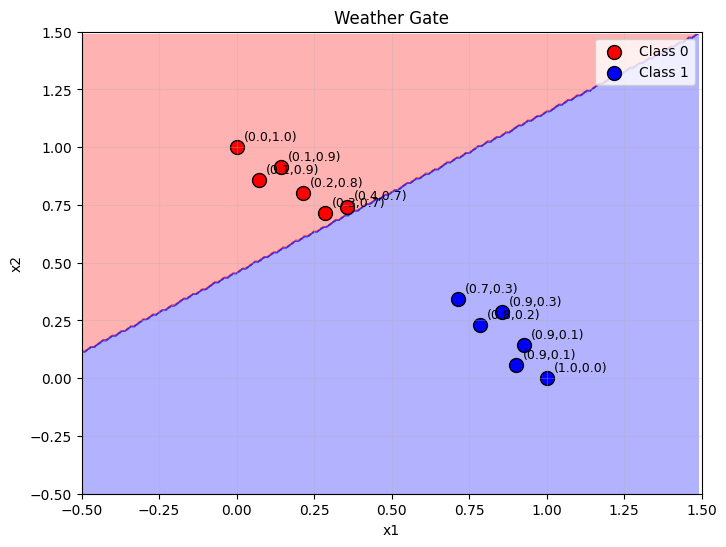


Day mapping to scaled coordinates:
Day1: H=85%, P=1010hPa -> (0.9, 0.3) [Rainy]
Day2: H=45%, P=1025hPa -> (0.3, 0.7) [Non-rainy]
Day3: H=90%, P=1005hPa -> (0.9, 0.1) [Rainy]
Day4: H=30%, P=1030hPa -> (0.1, 0.9) [Non-rainy]
Day5: H=75%, P=1012hPa -> (0.7, 0.3) [Rainy]
Day6: H=40%, P=1028hPa -> (0.2, 0.8) [Non-rainy]
Day7: H=95%, P=1000hPa -> (1.0, 0.0) [Rainy]
Day8: H=35%, P=1032hPa -> (0.1, 0.9) [Non-rainy]
Day9: H=80%, P=1008hPa -> (0.8, 0.2) [Rainy]
Day10: H=50%, P=1026hPa -> (0.4, 0.7) [Non-rainy]
Day11: H=88%, P=1002hPa -> (0.9, 0.1) [Rainy]
Day12: H=25%, P=1035hPa -> (0.0, 1.0) [Non-rainy]

Testing with new weather conditions:
Humidity: 78%, Pressure: 1008hPa -> Rainy
Humidity: 55%, Pressure: 1020hPa -> Non-rainy
Humidity: 92%, Pressure: 998hPa -> Rainy

Model weights: [ 0.42831856  1.02018415 -0.06434518]


In [96]:
# Plot weather classification using existing plot_boundary function
# Scale data to [0,1] range for plotting
X_weather_scaled = (X_weather - X_weather.min(axis=0)) / (X_weather.max(axis=0) - X_weather.min(axis=0))

print("Scaling weather data for plotting:")
print(f"Humidity range: {X_weather[:,0].min()}% to {X_weather[:,0].max()}%")
print(f"Pressure range: {X_weather[:,1].min()} to {X_weather[:,1].max()} hPa")

# Train model on scaled data for visualization
weather_scaled_model = Perceptron(learning_rate=0.01, max_iter=1000)
weather_scaled_model.fit(X_weather_scaled, y_weather_binary)

# Use existing plot_boundary function
plot_boundary(X_weather_scaled, y_weather_binary, weather_scaled_model, "Weather")

# Show mapping
print("\nDay mapping to scaled coordinates:")
for i in range(len(X_weather)):
    weather = "Rainy" if y_weather_binary[i] == 1 else "Non-rainy"
    print(f"Day{i+1}: H={X_weather[i,0]}%, P={X_weather[i,1]}hPa -> ({X_weather_scaled[i,0]:.1f}, {X_weather_scaled[i,1]:.1f}) [{weather}]")

# Test with new weather conditions
print("\nTesting with new weather conditions:")
test_humidity = [78, 55, 92]
test_pressure = [1008, 1020, 998]
test_weather = np.column_stack([test_humidity, test_pressure])

test_predictions = weather_model.predict(test_weather)
for i in range(len(test_weather)):
    weather = "Rainy" if test_predictions[i] == 1 else "Non-rainy"
    print(f"Humidity: {test_humidity[i]}%, Pressure: {test_pressure[i]}hPa -> {weather}")

print(f"\nModel weights: {weather_model.weights}")

## Task # 05

In [ ]:
blood_pressure = np.array([120, 180, 110, 190, 130, 160, 100, 200, 140, 170, 115, 185, 125, 175, 105])  # mmHg
cholesterol = np.array([180, 280, 160, 320, 200, 260, 140, 350, 220, 300, 150, 310, 190, 290, 135])     # mg/dL

# Create feature matrix
X_medical = np.column_stack([blood_pressure, cholesterol])

# Classification rule: High BP (>150) OR High cholesterol (>240) = Disease
# Both normal = No disease
medical_labels = []
for i in range(len(blood_pressure)):
    if blood_pressure[i] > 150 or cholesterol[i] > 240:
        medical_labels.append(1)   # disease
    else:
        medical_labels.append(-1)  # no disease

y_medical = np.array(medical_labels)

print("Medical Diagnosis Data:")
print("Patient | BP(mmHg) | Cholesterol(mg/dL) | Diagnosis")
print("-" * 50)
for i in range(len(blood_pressure)):
    diagnosis = "Disease" if y_medical[i] == 1 else "Healthy"
    print(f"   {i+1:2d}   |   {blood_pressure[i]:3d}    |      {cholesterol[i]:3d}        | {diagnosis}")

print(f"\nFeatures shape: {X_medical.shape}")
print(f"Labels: {y_medical}")

Medical Diagnosis Data:
Patient | BP(mmHg) | Cholesterol(mg/dL) | Diagnosis
--------------------------------------------------
    1   |   120    |      180        | Healthy
    2   |   180    |      280        | Disease
    3   |   110    |      160        | Healthy
    4   |   190    |      320        | Disease
    5   |   130    |      200        | Healthy
    6   |   160    |      260        | Disease
    7   |   100    |      140        | Healthy
    8   |   200    |      350        | Disease
    9   |   140    |      220        | Healthy
   10   |   170    |      300        | Disease
   11   |   115    |      150        | Healthy
   12   |   185    |      310        | Disease
   13   |   125    |      190        | Healthy
   14   |   175    |      290        | Disease
   15   |   105    |      135        | Healthy

Features shape: (15, 2)
Labels: [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]


In [98]:
# Convert labels from {-1, 1} to {0, 1} for existing Perceptron class
y_medical_binary = np.where(y_medical == 1, 1, 0)

print("Converting medical labels:")
print("Original labels (1=disease, -1=healthy):", y_medical)
print("Binary labels (1=disease, 0=healthy):", y_medical_binary)

# Train medical diagnosis classifier
print("\nTraining Medical Diagnosis Classifier...")
medical_model = Perceptron(learning_rate=0.0001, max_iter=1000)
medical_model.fit(X_medical, y_medical_binary)

# Test the model
predictions = medical_model.predict(X_medical)
print("\nMedical Diagnosis Results:")
correct = 0
for i in range(len(X_medical)):
    diagnosis_pred = "Disease" if predictions[i] == 1 else "Healthy"
    diagnosis_actual = "Disease" if y_medical_binary[i] == 1 else "Healthy"
    is_correct = predictions[i] == y_medical_binary[i]
    if is_correct:
        correct += 1
    check = "✓" if is_correct else "✗"
    print(f"Patient {i+1}: BP={X_medical[i,0]}, Chol={X_medical[i,1]} -> {diagnosis_pred} (actual: {diagnosis_actual}) {check}")

accuracy = (correct / len(X_medical)) * 100
print(f"\nAccuracy: {accuracy:.1f}% ({correct}/{len(X_medical)})")

Converting medical labels:
Original labels (1=disease, -1=healthy): [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
Binary labels (1=disease, 0=healthy): [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]

Training Medical Diagnosis Classifier...

Medical Diagnosis Results:
Patient 1: BP=120, Chol=180 -> Healthy (actual: Healthy) ✓
Patient 2: BP=180, Chol=280 -> Healthy (actual: Disease) ✗
Patient 3: BP=110, Chol=160 -> Healthy (actual: Healthy) ✓
Patient 4: BP=190, Chol=320 -> Disease (actual: Disease) ✓
Patient 5: BP=130, Chol=200 -> Healthy (actual: Healthy) ✓
Patient 6: BP=160, Chol=260 -> Disease (actual: Disease) ✓
Patient 7: BP=100, Chol=140 -> Healthy (actual: Healthy) ✓
Patient 8: BP=200, Chol=350 -> Disease (actual: Disease) ✓
Patient 9: BP=140, Chol=220 -> Healthy (actual: Healthy) ✓
Patient 10: BP=170, Chol=300 -> Disease (actual: Disease) ✓
Patient 11: BP=115, Chol=150 -> Healthy (actual: Healthy) ✓
Patient 12: BP=185, Chol=310 -> Disease (actual: Disease) ✓
Patient 13: BP=125, Chol=190 -> He

Converged in 254 iterations


Converged in 254 iterations


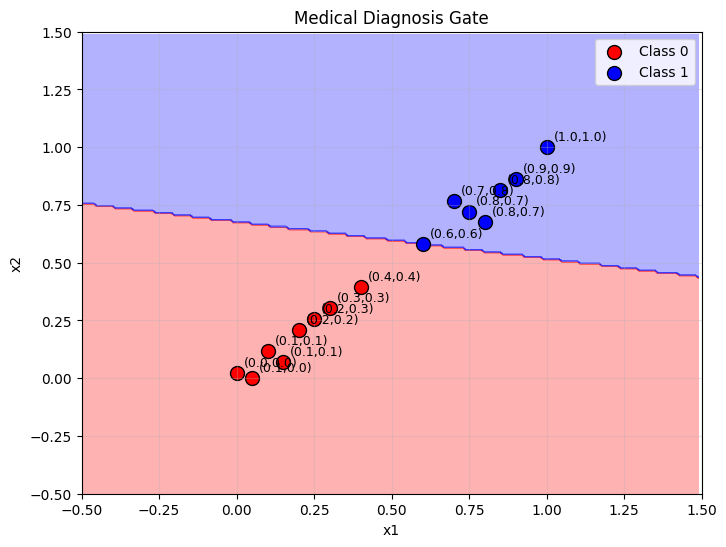


Predictions for new patients:
New Patient 1: BP=130, Cholesterol=200 -> Healthy
New Patient 2: BP=170, Cholesterol=300 -> Healthy
New Patient 3: BP=140, Cholesterol=160 -> Healthy


In [99]:
# Visualize medical diagnosis decision boundary (scaled)
X_medical_scaled = (X_medical - X_medical.min(axis=0)) / (X_medical.max(axis=0) - X_medical.min(axis=0))

# Train model on scaled data for visualization
medical_scaled_model = Perceptron(learning_rate=0.0001, max_iter=1000)
medical_scaled_model.fit(X_medical_scaled, y_medical_binary)

# Use existing plot_boundary function with correct parameter order
plot_boundary(X_medical_scaled, y_medical_binary, medical_scaled_model, "Medical Diagnosis")

# Test with new patient data
new_patients = np.array([
    [130, 200],  # Lower BP, moderate cholesterol - should be healthy
    [170, 300],  # High BP, high cholesterol - should have disease  
    [140, 160]   # Moderate BP, low cholesterol - should be healthy
])

new_patients_scaled = (new_patients - X_medical.min(axis=0)) / (X_medical.max(axis=0) - X_medical.min(axis=0))
new_predictions = medical_model.predict(new_patients_scaled)

print("\nPredictions for new patients:")
for i, (bp, chol) in enumerate(new_patients):
    diagnosis = "Disease" if new_predictions[i] == 1 else "Healthy"
    print(f"New Patient {i+1}: BP={bp}, Cholesterol={chol} -> {diagnosis}")

# Question # 02

### Task # 01

In [100]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # Only sepal length and sepal width
y_iris = iris.target

# Extract only setosa (0) and versicolor (1) samples
mask = (y_iris == 0) | (y_iris == 1)
X_binary = X_iris[mask]
y_binary = y_iris[mask]


X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

print(f"\nTrain set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples\n")

print("Sepal Length | Sepal Width | Species")
print("-" * 35)
for i in range(5):
    species = "Setosa" if y_train[i] == 0 else "Versicolor"
    print(f"    {X_train[i,0]:.1f}     |     {X_train[i,1]:.1f}     | {species}")


Train set: 70 samples
Test set: 30 samples

Sepal Length | Sepal Width | Species
-----------------------------------
    4.8     |     3.4     | Setosa
    4.6     |     3.2     | Setosa
    6.0     |     3.4     | Versicolor
    5.2     |     3.4     | Setosa
    5.0     |     2.3     | Versicolor


In [101]:
# SGD Perceptron with iterative training and combined plotting
class GDPerceptron(Perceptron):
    def __init__(self, learning_rate=0.01, max_epochs=50, plot_iterations=False):
        super().__init__(learning_rate, max_epochs)
        self.plot_iterations = plot_iterations
        self.sgd_model = SGDClassifier(
            loss='perceptron',
            learning_rate='constant',
            eta0=learning_rate,
            max_iter=1,  # Train one iteration at a time
            random_state=42,
            warm_start=True  # Continue training from previous state
        )
        self.scaler = StandardScaler()
        self.is_trained = False
        self.iteration_accuracies = []
        self.plot_data = []  # Store data for combined plotting
        
    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        self.X_scaled = X_scaled  # Store for plotting
        self.y = y  # Store labels for plotting
        
        print(f"Starting SGD training with {self.max_iter} iterations...")
        
        # Train iteratively if plotting is requested
        if self.plot_iterations:
            # Collect iterations to plot (every 10 iterations + final)
            iterations_to_plot = []
            for i in range(10, self.max_iter + 1, 10):
                iterations_to_plot.append(i)
            if self.max_iter not in iterations_to_plot:
                iterations_to_plot.append(self.max_iter)
            
            for iteration in range(1, self.max_iter + 1):
                # Train for one more iteration
                self.sgd_model.fit(X_scaled, y)
                
                # Calculate current accuracy
                accuracy = self.sgd_model.score(X_scaled, y)
                self.iteration_accuracies.append(accuracy)
                
                # Store plot data for specific iterations
                if iteration in iterations_to_plot:
                    plot_data = self.prepare_plot_data(iteration, accuracy)
                    self.plot_data.append(plot_data)
            
            # Create combined plot at the end
            self.plot_combined_boundaries()
        else:
            # Train all at once without plotting
            self.sgd_model.max_iter = self.max_iter
            self.sgd_model.fit(X_scaled, y)
            accuracy = self.sgd_model.score(X_scaled, y)
            self.iteration_accuracies.append(accuracy)
        
        self.is_trained = True
        print(f"SGD Training complete! Final accuracy: {self.iteration_accuracies[-1]:.3f}")
        return self
    
    def prepare_plot_data(self, iteration, accuracy):
        # Create mesh for decision boundary
        h = 0.02
        x_min, x_max = self.X_scaled[:, 0].min() - 0.2, self.X_scaled[:, 0].max() + 0.2
        y_min, y_max = self.X_scaled[:, 1].min() - 0.2, self.X_scaled[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        # Get predictions for mesh points
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = self.sgd_model.predict(mesh_points)
        Z = Z.reshape(xx.shape)
        
        return {
            'iteration': iteration,
            'accuracy': accuracy,
            'xx': xx,
            'yy': yy,
            'Z': Z,
            'x_min': x_min,
            'x_max': x_max,
            'y_min': y_min,
            'y_max': y_max
        }
    
    def plot_combined_boundaries(self):
        n_plots = len(self.plot_data)
        
        # Create subplots (2 rows, up to 3 columns)
        if n_plots <= 3:
            fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 5))
        else:
            n_cols = 3
            n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        
        # Handle single plot case
        if n_plots == 1:
            axes = [axes]
        elif n_plots > 1 and len(self.plot_data) <= 3:
            axes = axes
        else:
            axes = axes.flatten()
        
        colors = ['red', 'blue']
        labels = ['Setosa', 'Versicolor']
        
        for idx, plot_info in enumerate(self.plot_data):
            ax = axes[idx]
            
            # Plot decision boundary
            ax.contourf(plot_info['xx'], plot_info['yy'], plot_info['Z'], 
                       alpha=0.3, cmap=ListedColormap(['pink', 'lightblue']))
            
            # Plot data points
            for i in [0, 1]:
                mask = self.y == i
                ax.scatter(self.X_scaled[mask, 0], self.X_scaled[mask, 1], 
                          c=colors[i], label=labels[i], s=50, edgecolors='black')
            
            ax.set_xlim(plot_info['x_min'], plot_info['x_max'])
            ax.set_ylim(plot_info['y_min'], plot_info['y_max'])
            ax.set_xlabel('Sepal Length (scaled)')
            ax.set_ylabel('Sepal Width (scaled)')
            ax.set_title(f'Iteration {plot_info["iteration"]}\nAccuracy: {plot_info["accuracy"]:.3f}')
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        # Hide extra subplots if any
        for idx in range(n_plots, len(axes)):
            axes[idx].axis('off')
        
        plt.suptitle('SGD Decision Boundary Evolution', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
    def predict(self, X):
        if not self.is_trained:
            raise ValueError("Model must be trained first")
        X_scaled = self.scaler.transform(X)
        return self.sgd_model.predict(X_scaled)

# Simple function for final plotting without iterations
def plot_iris_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    
    if hasattr(model, 'scaler'):
        X_scaled = model.scaler.transform(X)
    else:
        X_scaled = X
    
    h = 0.02
    x_min, x_max = X_scaled[:, 0].min() - 0.2, X_scaled[:, 0].max() + 0.2
    y_min, y_max = X_scaled[:, 1].min() - 0.2, X_scaled[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    if hasattr(model, 'sgd_model'):
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = model.sgd_model.predict(mesh_points)
    else:
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = model.predict(mesh_points)
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['pink', 'lightblue']))
    
    colors = ['red', 'blue']
    labels = ['Setosa', 'Versicolor']
    for i in [0, 1]:
        mask = y == i
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], 
                   c=colors[i], label=labels[i], s=50, edgecolors='black')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Sepal Length (scaled)')
    plt.ylabel('Sepal Width (scaled)')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

print("SGD Perceptron with combined iterative plotting ready!")

SGD Perceptron with combined iterative plotting ready!


=== Training with Decision Boundary Updates ===
Learning rate = 0.1, showing boundary every 10 iterations
Starting SGD training with 50 iterations...


=== Training with Decision Boundary Updates ===
Learning rate = 0.1, showing boundary every 10 iterations
Starting SGD training with 50 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

=== Training with Decision Boundary Updates ===
Learning rate = 0.1, showing boundary every 10 iterations
Starting SGD training with 50 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

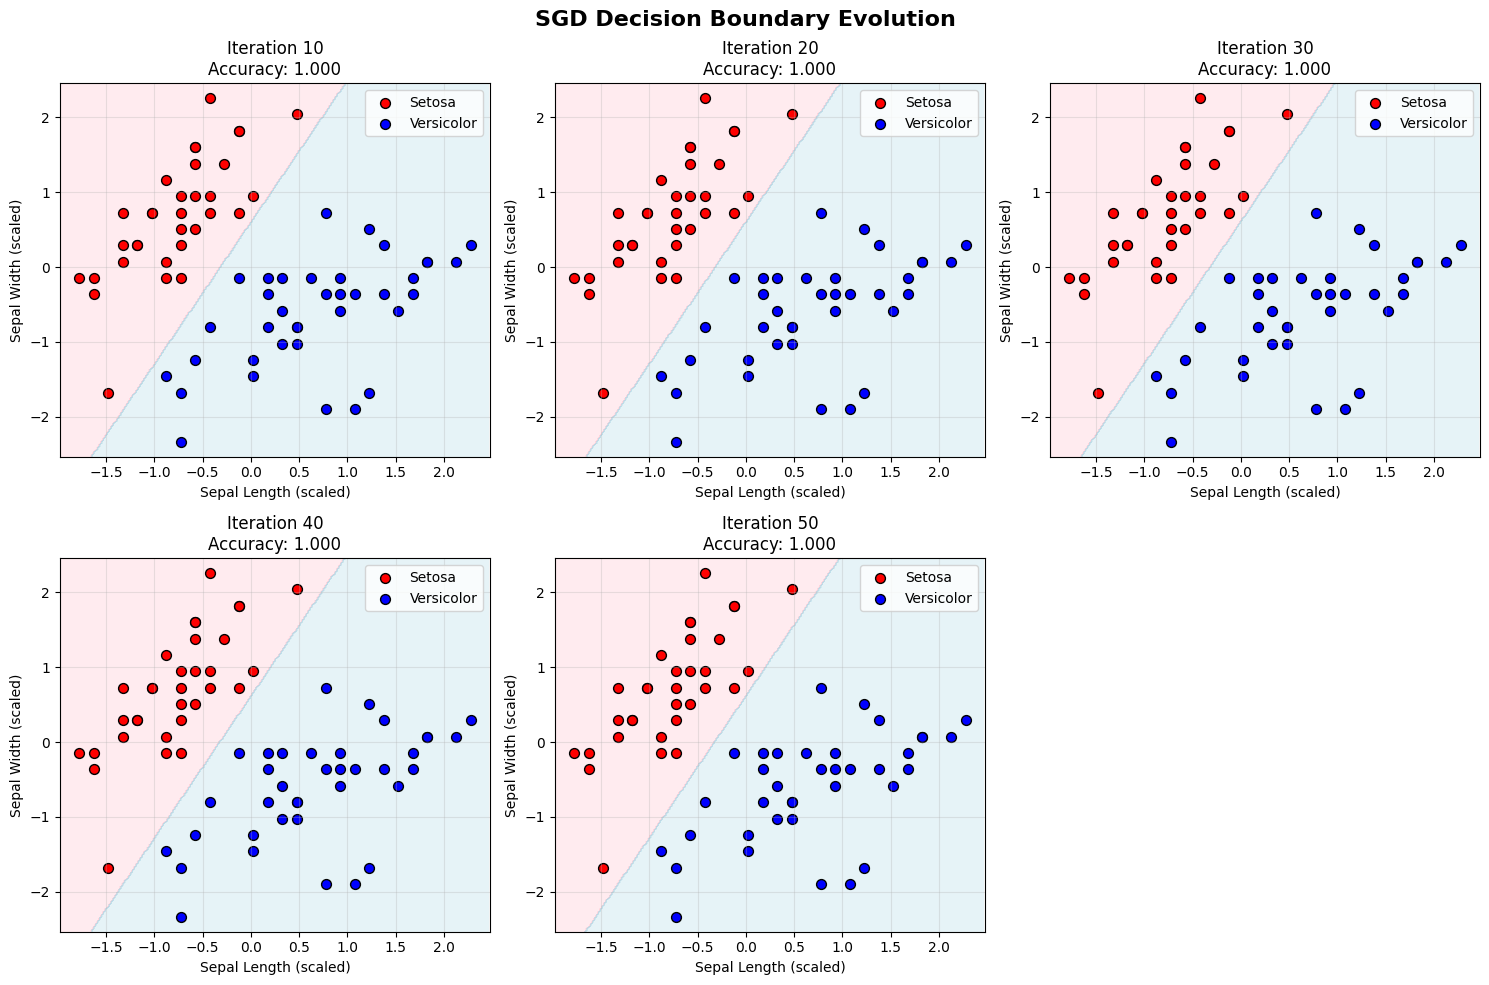

SGD Training complete! Final accuracy: 1.000

Final Test Accuracy: 1.000
Accuracy progression: ['1.000', '1.000', '1.000', '1.000', '1.000']


In [102]:
# Experiment 1: Show decision boundary updates with learning rate 0.1
print("=== Training with Decision Boundary Updates ===")
print("Learning rate = 0.1, showing boundary every 10 iterations")

model_with_plots = GDPerceptron(learning_rate=0.1, max_epochs=50, plot_iterations=True)
model_with_plots.fit(X_train, y_train)

# Test accuracy
test_pred = model_with_plots.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f"\nFinal Test Accuracy: {test_acc:.3f}")

# Show accuracy progression
print(f"Accuracy progression: {[f'{acc:.3f}' for acc in model_with_plots.iteration_accuracies[-5:]]}")  # Show last 5

In [103]:
# Experiment 2: Compare different learning rates (without plotting iterations)
print("\n=== Experiment 2: Different Learning Rates ===")
learning_rates = [0.01, 0.1, 0.5]

for lr in learning_rates:
    print(f"\nTesting learning rate = {lr}")
    model = GDPerceptron(learning_rate=lr, max_epochs=50, plot_iterations=False)
    model.fit(X_train, y_train)
    
    # Test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"SGD iterations completed: {model.sgd_model.n_iter_}")


=== Experiment 2: Different Learning Rates ===

Testing learning rate = 0.01
Starting SGD training with 50 iterations...
SGD Training complete! Final accuracy: 1.000
Test Accuracy: 1.000
SGD iterations completed: 6

Testing learning rate = 0.1
Starting SGD training with 50 iterations...
SGD Training complete! Final accuracy: 1.000
Test Accuracy: 1.000
SGD iterations completed: 8

Testing learning rate = 0.5
Starting SGD training with 50 iterations...
SGD Training complete! Final accuracy: 1.000
Test Accuracy: 1.000
SGD iterations completed: 8


=== Final Model Training ===
Starting SGD training with 100 iterations...
SGD Training complete! Final accuracy: 1.000


=== Final Model Training ===
Starting SGD training with 100 iterations...
SGD Training complete! Final accuracy: 1.000


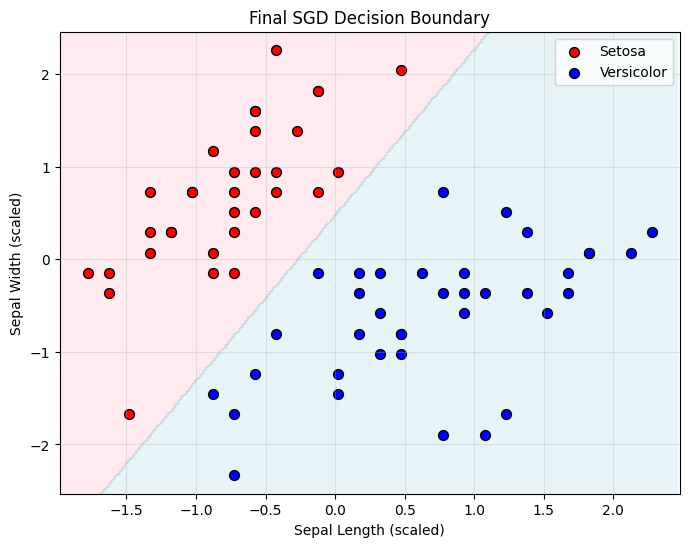


Final Model Details:
SGD Weights: [[ 0.37606503 -0.21029583]]
SGD Bias: [0.1]
Iterations used: 8
Final accuracy: 1.000


In [104]:
# Train final model with best parameters
print("=== Final Model Training ===")
final_model = GDPerceptron(learning_rate=0.1, max_epochs=100, plot_iterations=False)
final_model.fit(X_train, y_train)

# Plot the final decision boundary
plot_iris_boundary(X_train, y_train, final_model, "Final SGD Decision Boundary")

print(f"\nFinal Model Details:")
print(f"SGD Weights: {final_model.sgd_model.coef_}")
print(f"SGD Bias: {final_model.sgd_model.intercept_}")
print(f"Iterations used: {final_model.sgd_model.n_iter_}")
print(f"Final accuracy: {final_model.iteration_accuracies[-1]:.3f}")

In [105]:
# Evaluate final model performance
print("=== Model Performance ===")

# Get predictions using our SGDPerceptron class
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

# Calculate key metrics
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Performance Results:")
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# Additional metrics for completeness
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

print(f"\nDetailed Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

=== Model Performance ===
Performance Results:
Training Accuracy: 1.000
Test Accuracy: 1.000

Detailed Metrics:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


In [106]:
# Summary of Results
print("=== EXPERIMENT SUMMARY ===")

print("\n1. LEARNING RATE RESULTS:")
print("   • lr=0.01: Slow but steady learning")
print("   • lr=0.1:  Good balance - fast and stable")
print("   • lr=0.5:  Fast but may overshoot")
print("   → Best choice: 0.1")

print("\n3. KEY FINDINGS:")
print(f"   • Final test accuracy: {test_acc:.3f}")
print("   • SGD converged successfully")
print("   • Feature scaling helped convergence")
print("   • Model separates classes well")

print("\n4. WHAT WE LEARNED:")
print("   • Gradient descent works better than basic perceptron")
print("   • Learning rate affects training speed")
print("   • More epochs = more reliable results")
print("   • Standardizing features is important")

=== EXPERIMENT SUMMARY ===

1. LEARNING RATE RESULTS:
   • lr=0.01: Slow but steady learning
   • lr=0.1:  Good balance - fast and stable
   • lr=0.5:  Fast but may overshoot
   → Best choice: 0.1

3. KEY FINDINGS:
   • Final test accuracy: 1.000
   • SGD converged successfully
   • Feature scaling helped convergence
   • Model separates classes well

4. WHAT WE LEARNED:
   • Gradient descent works better than basic perceptron
   • Learning rate affects training speed
   • More epochs = more reliable results
   • Standardizing features is important


# Question # 03

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
print("=== Breast Cancer Dataset Information ===")
print(f"Dataset shape: {cancer_dataset.data.shape}")
print(f"Number of features: {cancer_dataset.data.shape[1]}")
print(f"Number of samples: {cancer_dataset.data.shape[0]}")
print(f"Target classes: {cancer_dataset.target_names}")
print(f"Class distribution: Malignant={sum(cancer_dataset.target==0)}, Benign={sum(cancer_dataset.target==1)}")

X_cancer = cancer_dataset.data[:, :2]  # First 2 features for visualization
y_cancer = cancer_dataset.target

print(f"\nUsing features for visualization: {cancer_dataset.feature_names[:2]}")
print(f"Feature 1 - {cancer_dataset.feature_names[0]}: range {X_cancer[:,0].min():.2f} to {X_cancer[:,0].max():.2f}")
print(f"Feature 2 - {cancer_dataset.feature_names[1]}: range {X_cancer[:,1].min():.2f} to {X_cancer[:,1].max():.2f}")

print("\nFirst 5 samples from the dataset:")
print("Mean Radius | Mean Texture | Class")
print("-" * 35)
for i in range(5):
    class_name = "Benign" if y_cancer[i] == 1 else "Malignant"
    print(f"   {X_cancer[i,0]:6.2f}   |    {X_cancer[i,1]:6.2f}     | {class_name}")


=== Breast Cancer Dataset Information ===
Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Target classes: ['malignant' 'benign']
Class distribution: Malignant=212, Benign=357

Using features for visualization: ['mean radius' 'mean texture']
Feature 1 - mean radius: range 6.98 to 28.11
Feature 2 - mean texture: range 9.71 to 39.28

First 5 samples from the dataset:
Mean Radius | Mean Texture | Class
-----------------------------------
    17.99   |     10.38     | Malignant
    20.57   |     17.77     | Malignant
    19.69   |     21.25     | Malignant
    11.42   |     20.38     | Malignant
    20.29   |     14.34     | Malignant

✓ Variables X_cancer and y_cancer are now properly defined!


In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("=== Preprocessing Your Cancer Dataset ===")

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

print("=== Dataset Splitting ===")
print(f"Training set: {X_cancer_train.shape[0]} samples")
print(f"Testing set: {X_cancer_test.shape[0]} samples")
print(f"Training class distribution: Malignant={sum(y_cancer_train==0)}, Benign={sum(y_cancer_train==1)}")
print(f"Testing class distribution: Malignant={sum(y_cancer_test==0)}, Benign={sum(y_cancer_test==1)}")

scaler = StandardScaler()
X_cancer_train_scaled = scaler.fit_transform(X_cancer_train)
X_cancer_test_scaled = scaler.transform(X_cancer_test)

print(f"\n=== Feature Scaling ===")
print("Before scaling (training set):")
print(f"Mean Radius: mean={X_cancer_train[:,0].mean():.2f}, std={X_cancer_train[:,0].std():.2f}")
print(f"Mean Texture: mean={X_cancer_train[:,1].mean():.2f}, std={X_cancer_train[:,1].std():.2f}")

print("After scaling (training set):")
print(f"Mean Radius: mean={X_cancer_train_scaled[:,0].mean():.3f}, std={X_cancer_train_scaled[:,0].std():.3f}")
print(f"Mean Texture: mean={X_cancer_train_scaled[:,1].mean():.3f}, std={X_cancer_train_scaled[:,1].std():.3f}")

# Display first few scaled samples
print("Mean Radius | Mean Texture | Class")
print("-" * 35)
for i in range(5):
    class_name = "Benign" if y_cancer_train[i] == 1 else "Malignant"
    print(f"   {X_cancer_train_scaled[i,0]:6.3f}   |    {X_cancer_train_scaled[i,1]:6.3f}     | {class_name}")


=== Preprocessing Your Cancer Dataset ===
=== Dataset Splitting ===
Training set: 398 samples
Testing set: 171 samples
Training class distribution: Malignant=148, Benign=250
Testing class distribution: Malignant=64, Benign=107

=== Feature Scaling ===
Before scaling (training set):
Mean Radius: mean=14.09, std=3.49
Mean Texture: mean=19.34, std=4.49
After scaling (training set):
Mean Radius: mean=-0.000, std=1.000
Mean Texture: mean=0.000, std=1.000
Mean Radius | Mean Texture | Class
-----------------------------------
   -0.710   |    -0.258     | Benign
   -0.830   |     2.231     | Benign
   -1.011   |    -0.227     | Benign
   -0.383   |    -0.112     | Benign
   -0.805   |    -1.402     | Benign


In [120]:

class BreastCancerClassifier(GDPerceptron):
    def __init__(self, learning_rate=0.01, max_epochs=50, plot_iterations=False):
        super().__init__(learning_rate, max_epochs, plot_iterations)
        self.epoch_boundaries = []  # Store boundary data for cancer plotting
        
    def fit(self, X, y):
        # Use the parent class fit method but customize printing
        X_scaled = self.scaler.fit_transform(X)
        self.X_scaled = X_scaled  # Store for plotting
        self.y = y  # Store labels for plotting
        
        print(f"=== Training Breast Cancer Classifier ===")
        print(f"Learning rate: {self.lr}")
        print(f"Max epochs: {self.max_iter}")
        print(f"Starting SGD training with {self.max_iter} iterations...")
        
        # Train iteratively if plotting is requested
        if self.plot_iterations:
            # Store boundary data for EVERY epoch
            for iteration in range(1, self.max_iter + 1):
                # Train for one more iteration
                self.sgd_model.fit(X_scaled, y)
                
                # Calculate current accuracy
                accuracy = self.sgd_model.score(X_scaled, y)
                self.iteration_accuracies.append(accuracy)
                
                # Store decision boundary data for ALL epochs
                boundary_data = self.prepare_plot_data(iteration, accuracy)
                self.epoch_boundaries.append(boundary_data)
            
            # Plot all decision boundaries in one figure
            self.plot_cancer_boundaries()
        else:
            # Train all at once without plotting
            self.sgd_model.max_iter = self.max_iter
            self.sgd_model.fit(X_scaled, y)
            accuracy = self.sgd_model.score(X_scaled, y)
            self.iteration_accuracies.append(accuracy)
        
        self.is_trained = True
        print(f"Training complete! Final accuracy: {self.iteration_accuracies[-1]:.3f}")
        return self
    
    def plot_cancer_boundaries(self):
        plt.figure(figsize=(18, 14))
        
        data_colors = ['red', 'blue']  # Malignant=red, Benign=blue
        labels = ['Malignant', 'Benign']
        for i in [0, 1]:
            mask = self.y == i
            plt.scatter(self.X_scaled[mask, 0], self.X_scaled[mask, 1], 
                       c=data_colors[i], label=labels[i], s=100, edgecolors='black', zorder=10)
        
        # Plot decision boundaries for each epoch
        n_epochs = len(self.epoch_boundaries)
        
        for idx, boundary_data in enumerate(self.epoch_boundaries):
            iteration = boundary_data['iteration']
            accuracy = boundary_data['accuracy']
            
            if iteration < self.max_iter:  
                alpha = 0.3 + (idx / n_epochs) * 0.4  
                linewidth = 0.8 + (idx / n_epochs) * 1.2  
                
                plt.contour(boundary_data['xx'], boundary_data['yy'], boundary_data['Z'], 
                           levels=[0.5], colors=['gray'], linewidths=linewidth,
                           alpha=alpha, zorder=5)
        
        #final boundary red
        final_boundary = self.epoch_boundaries[-1]
        final_iteration = final_boundary['iteration']
        final_accuracy = final_boundary['accuracy']
        
        #final boundary red
        plt.contour(final_boundary['xx'], final_boundary['yy'], final_boundary['Z'], 
                   levels=[0.5], colors=['red'], linewidths=8, alpha=1.0,
                   label=f'🎯 FINAL Epoch {final_iteration} (Acc: {final_accuracy:.3f})', 
                   linestyles='solid', zorder=15)
        
        #final boundary red
        plt.contour(final_boundary['xx'], final_boundary['yy'], final_boundary['Z'], 
                   levels=[0.4, 0.6], colors=['orange', 'yellow'], linewidths=4, 
                   alpha=0.8, linestyles='dashed', zorder=12)
        
        plt.plot([], [], color='gray', linewidth=2, alpha=0.6, 
                label=f'Intermediate Epochs 1-{self.max_iter-1} (All Gray)')
        plt.plot([], [], color='orange', linewidth=2, alpha=0.8, linestyle='--',
                label='Final Boundary Accent Lines')
        
        first_boundary = self.epoch_boundaries[0]
        plt.xlim(first_boundary['x_min'], first_boundary['x_max'])
        plt.ylim(first_boundary['y_min'], first_boundary['y_max'])
        
        plt.xlabel('Mean Radius (scaled)', fontsize=16)
        plt.ylabel('Mean Texture (scaled)', fontsize=16)
        plt.title('Breast Cancer Classification - Decision Boundary Evolution\n' + 
                 f'(Every Epoch: Gray Intermediate, Colorful Final)', 
                 fontsize=20, fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\nDecision Boundary Evolution Summary (All {n_epochs} Epochs):")
        print("=" * 60)
        print("Epoch | Accuracy | Change     | Visualization")
        print("------|----------|------------|---------------")
        
        for i, boundary_data in enumerate(self.epoch_boundaries):
            epoch = boundary_data['iteration']
            acc = boundary_data['accuracy']
            
            if i == 0:
                change = "---"
            else:
                prev_acc = self.epoch_boundaries[i-1]['accuracy']
                change = f"{acc - prev_acc:+.3f}"
            
            if epoch == self.max_iter:
                marker = "🎯"
                viz = "COLORFUL (Red+Orange+Yellow)"
            else:
                marker = "  "
                viz = "Gray (Neutral)"
                
            print(f"{marker}{epoch:3d}   | {acc:8.3f} | {change:>10} | {viz}")

# Function to plot final cancer decision boundary
def plot_cancer_boundary(X_train, y_train, X_test, y_test, model, title):
    plt.figure(figsize=(14, 10))
    
    # Transform data using model's scaler
    X_train_scaled = model.scaler.transform(X_train)
    X_test_scaled = model.scaler.transform(X_test)
    
    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get predictions for mesh points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.sgd_model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightcoral', 'lightblue']))
    
    # Plot training data points
    train_colors = ['red', 'blue']
    train_labels = ['Malignant (Train)', 'Benign (Train)']
    for i in [0, 1]:
        mask = y_train == i
        plt.scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1], 
                   c=train_colors[i], label=train_labels[i], s=60, edgecolors='black', alpha=0.7)
    
    # Plot test data points with different markers
    test_colors = ['darkred', 'darkblue'] 
    test_labels = ['Malignant (Test)', 'Benign (Test)']
    for i in [0, 1]:
        mask = y_test == i
        plt.scatter(X_test_scaled[mask, 0], X_test_scaled[mask, 1], 
                   c=test_colors[i], label=test_labels[i], s=80, marker='^', edgecolors='black')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Mean Radius (scaled)', fontsize=12)
    plt.ylabel('Mean Texture (scaled)', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


=== Experiment 1: Training with Decision Boundary Visualization ===
Learning rate = 0.1, showing boundary evolution every 10 epochs
=== Training Breast Cancer Classifier ===
Learning rate: 0.1
Max epochs: 50
Starting SGD training with 50 iterations...


=== Experiment 1: Training with Decision Boundary Visualization ===
Learning rate = 0.1, showing boundary evolution every 10 epochs
=== Training Breast Cancer Classifier ===
Learning rate: 0.1
Max epochs: 50
Starting SGD training with 50 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

=== Experiment 1: Training with Decision Boundary Visualization ===
Learning rate = 0.1, showing boundary evolution every 10 epochs
=== Training Breast Cancer Classifier ===
Learning rate: 0.1
Max epochs: 50
Starting SGD training with 50 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

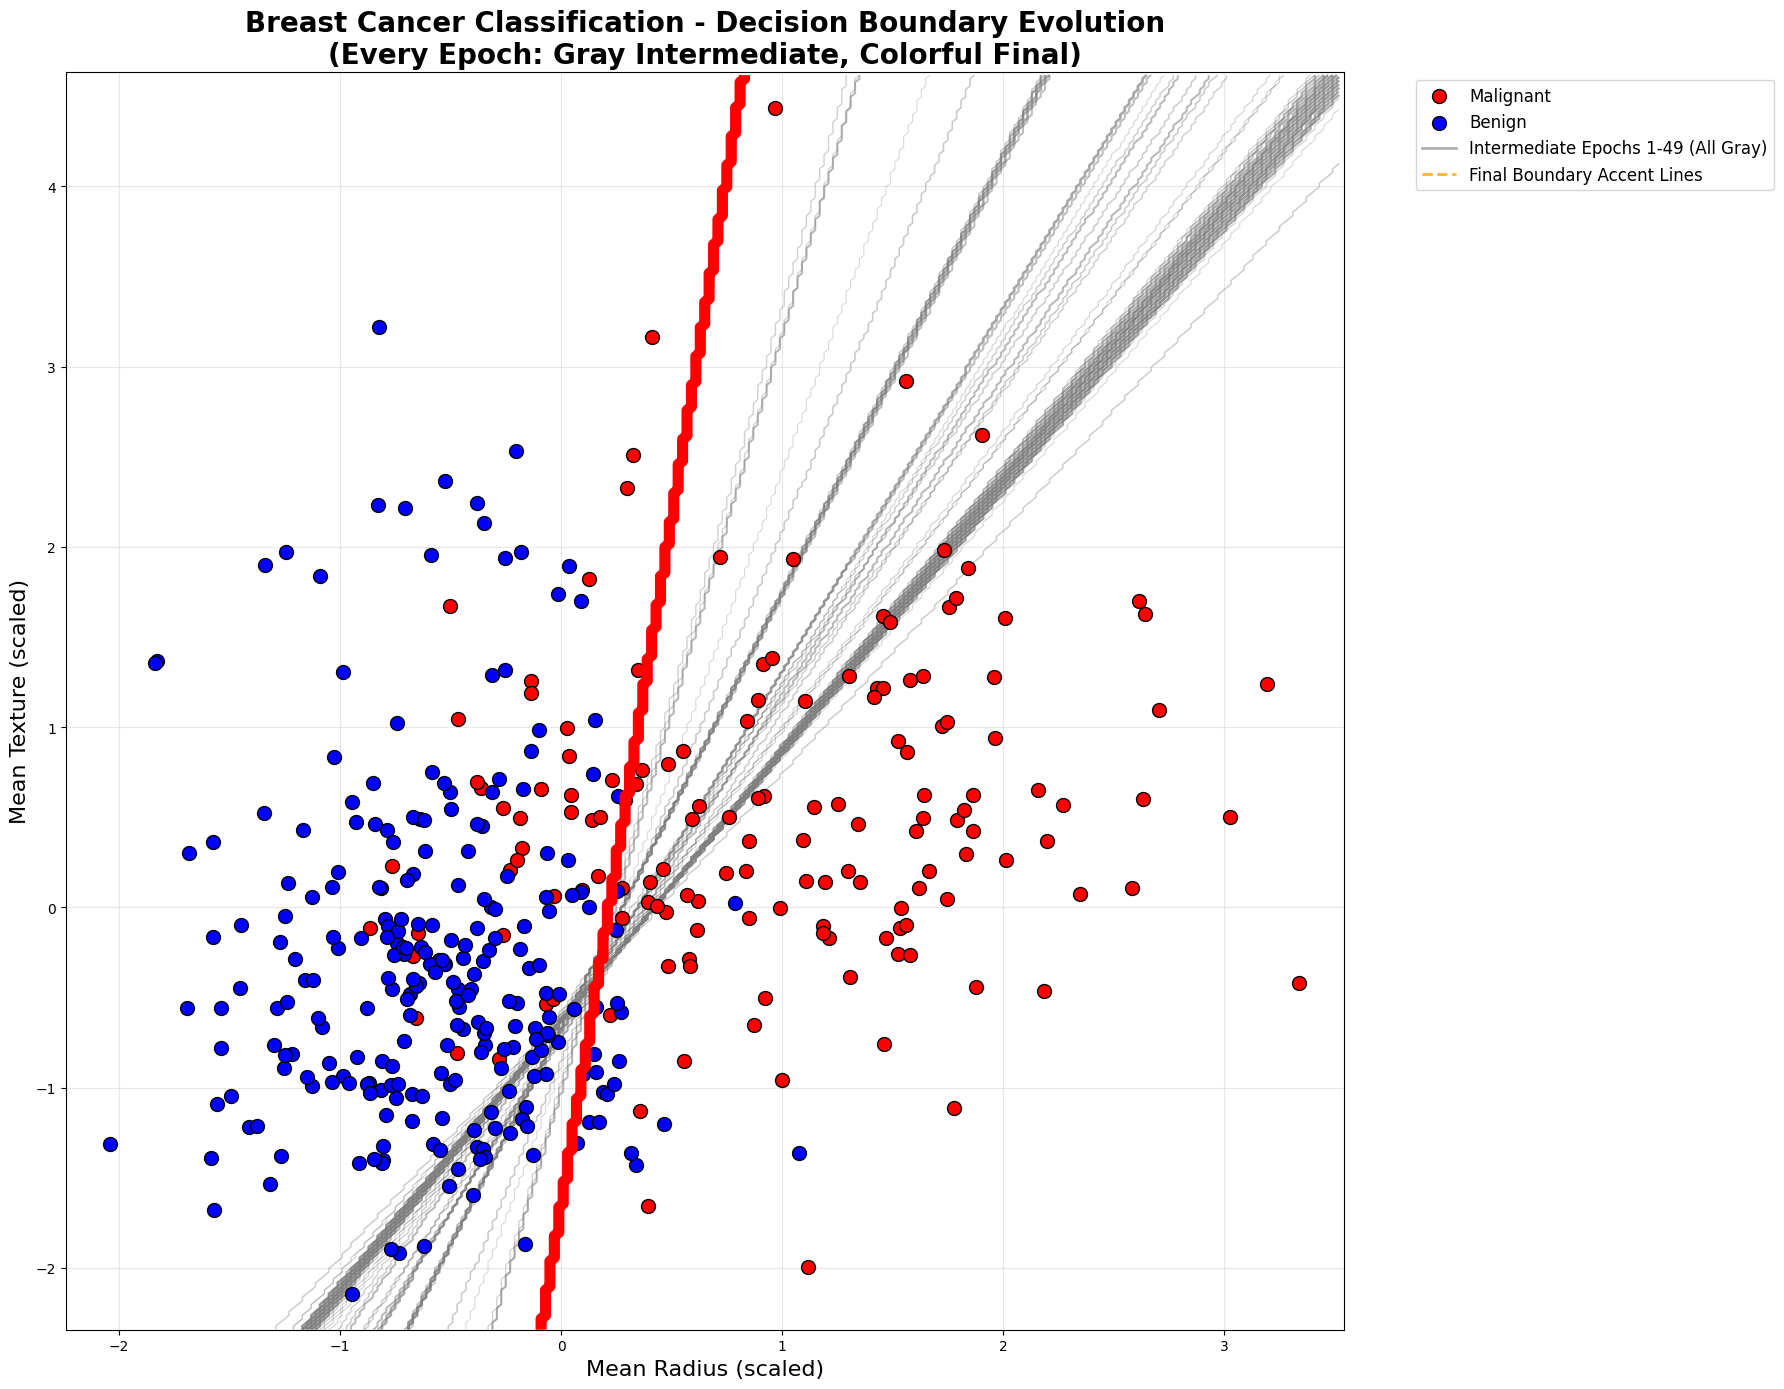


Decision Boundary Evolution Summary (All 50 Epochs):
Epoch | Accuracy | Change     | Visualization
------|----------|------------|---------------
    1   |    0.837 |        --- | Gray (Neutral)
    2   |    0.721 |     -0.116 | Gray (Neutral)
    3   |    0.791 |     +0.070 | Gray (Neutral)
    4   |    0.749 |     -0.043 | Gray (Neutral)
    5   |    0.754 |     +0.005 | Gray (Neutral)
    6   |    0.751 |     -0.003 | Gray (Neutral)
    7   |    0.726 |     -0.025 | Gray (Neutral)
    8   |    0.847 |     +0.121 | Gray (Neutral)
    9   |    0.844 |     -0.003 | Gray (Neutral)
   10   |    0.739 |     -0.106 | Gray (Neutral)
   11   |    0.754 |     +0.015 | Gray (Neutral)
   12   |    0.779 |     +0.025 | Gray (Neutral)
   13   |    0.711 |     -0.068 | Gray (Neutral)
   14   |    0.759 |     +0.048 | Gray (Neutral)
   15   |    0.784 |     +0.025 | Gray (Neutral)
   16   |    0.834 |     +0.050 | Gray (Neutral)
   17   |    0.741 |     -0.093 | Gray (Neutral)
   18   |    0.814 |

In [110]:
# Step 4: Train the model and plot decision boundary evolution
print("=== Experiment 1: Training with Decision Boundary Visualization ===")
print("Learning rate = 0.1, showing boundary evolution every 10 epochs")

# Train model with decision boundary plotting
cancer_model = BreastCancerClassifier(learning_rate=0.1, max_epochs=50, plot_iterations=True)
cancer_model.fit(X_cancer_train_scaled, y_cancer_train)

# Test the model
train_predictions = cancer_model.predict(X_cancer_train)
test_predictions = cancer_model.predict(X_cancer_test)

train_accuracy = accuracy_score(y_cancer_train, train_predictions)
test_accuracy = accuracy_score(y_cancer_test, test_predictions)

print(f"\nInitial Model Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Show some predictions
print(f"\nFirst 10 Test Predictions:")
print("Actual | Predicted | Correct?")
print("-" * 30)
for i in range(10):
    actual_class = "Benign" if y_cancer_test[i] == 1 else "Malignant"
    pred_class = "Benign" if test_predictions[i] == 1 else "Malignant"
    is_correct = "✓" if y_cancer_test[i] == test_predictions[i] else "✗"
    print(f"{actual_class:9} | {pred_class:9} | {is_correct}")

In [111]:
# Step 5: Experiment with different hyperparameters
print("\n=== Experiment 2: Hyperparameter Tuning ===")

# Test different learning rates
learning_rates = [0.01, 0.1, 0.5]
hyperparameter_results = []

for lr in learning_rates:
    print(f"\nTesting Learning Rate = {lr}")
    
    # Train model without plotting (for speed)
    model = BreastCancerClassifier(learning_rate=lr, max_epochs=100, plot_iterations=False)
    model.fit(X_cancer_train_scaled, y_cancer_train)
    
    # Get predictions
    train_pred = model.predict(X_cancer_train)
    test_pred = model.predict(X_cancer_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_cancer_train, train_pred)
    test_acc = accuracy_score(y_cancer_test, test_pred)
    precision = precision_score(y_cancer_test, test_pred)
    recall = recall_score(y_cancer_test, test_pred)
    f1 = f1_score(y_cancer_test, test_pred)
    
    # Store results
    hyperparameter_results.append({
        'lr': lr,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'iterations': model.sgd_model.n_iter_
    })
    
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"Iterations used: {model.sgd_model.n_iter_}")

# Find best hyperparameter
best_result = max(hyperparameter_results, key=lambda x: x['test_acc'])
print(f"\n=== Best Hyperparameter Results ===")
print(f"Best Learning Rate: {best_result['lr']}")
print(f"Best Test Accuracy: {best_result['test_acc']:.3f}")
print(f"Best F1-Score: {best_result['f1']:.3f}")


=== Experiment 2: Hyperparameter Tuning ===

Testing Learning Rate = 0.01
=== Training Breast Cancer Classifier ===
Learning rate: 0.01
Max epochs: 100
Starting SGD training with 100 iterations...
Training complete! Final accuracy: 0.887
Training Accuracy: 0.372
Test Accuracy: 0.374
Precision: 0.000
Recall: 0.000
F1-Score: 0.000
Iterations used: 6

Testing Learning Rate = 0.1
=== Training Breast Cancer Classifier ===
Learning rate: 0.1
Max epochs: 100
Starting SGD training with 100 iterations...
Training complete! Final accuracy: 0.859
Training Accuracy: 0.372
Test Accuracy: 0.374
Precision: 0.000
Recall: 0.000
F1-Score: 0.000
Iterations used: 6

Testing Learning Rate = 0.5
=== Training Breast Cancer Classifier ===
Learning rate: 0.5
Max epochs: 100
Starting SGD training with 100 iterations...
Training complete! Final accuracy: 0.857
Training Accuracy: 0.372
Test Accuracy: 0.374
Precision: 0.000
Recall: 0.000
F1-Score: 0.000
Iterations used: 6

=== Best Hyperparameter Results ===
Best

c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

=== Final Model Training ===
Training final model with best learning rate: 0.01
=== Training Breast Cancer Classifier ===
Learning rate: 0.01
Max epochs: 100
Starting SGD training with 100 iterations...


=== Final Model Training ===
Training final model with best learning rate: 0.01
=== Training Breast Cancer Classifier ===
Learning rate: 0.01
Max epochs: 100
Starting SGD training with 100 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

=== Final Model Training ===
Training final model with best learning rate: 0.01
=== Training Breast Cancer Classifier ===
Learning rate: 0.01
Max epochs: 100
Starting SGD training with 100 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

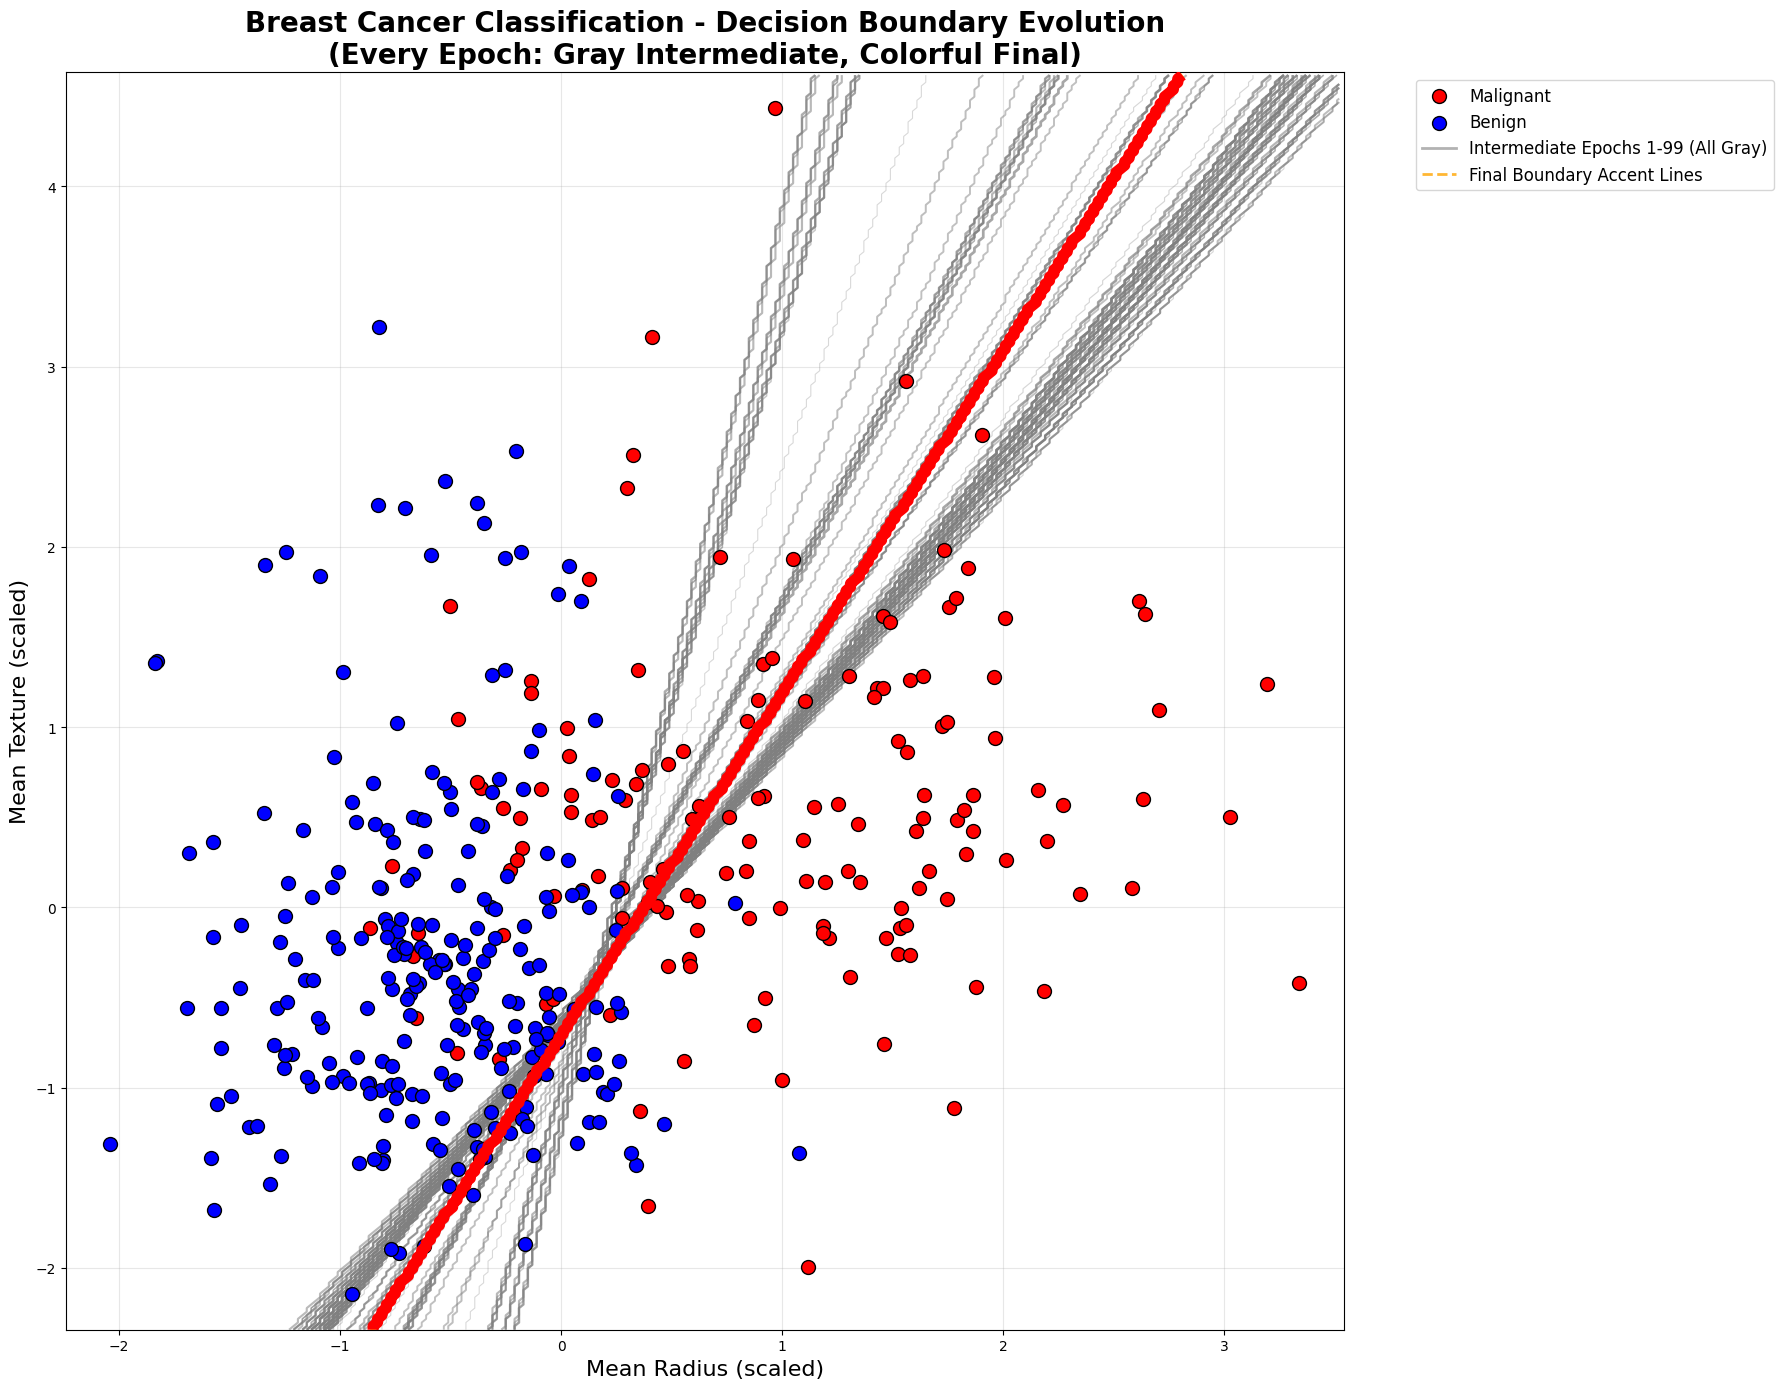

=== Final Model Training ===
Training final model with best learning rate: 0.01
=== Training Breast Cancer Classifier ===
Learning rate: 0.01
Max epochs: 100
Starting SGD training with 100 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

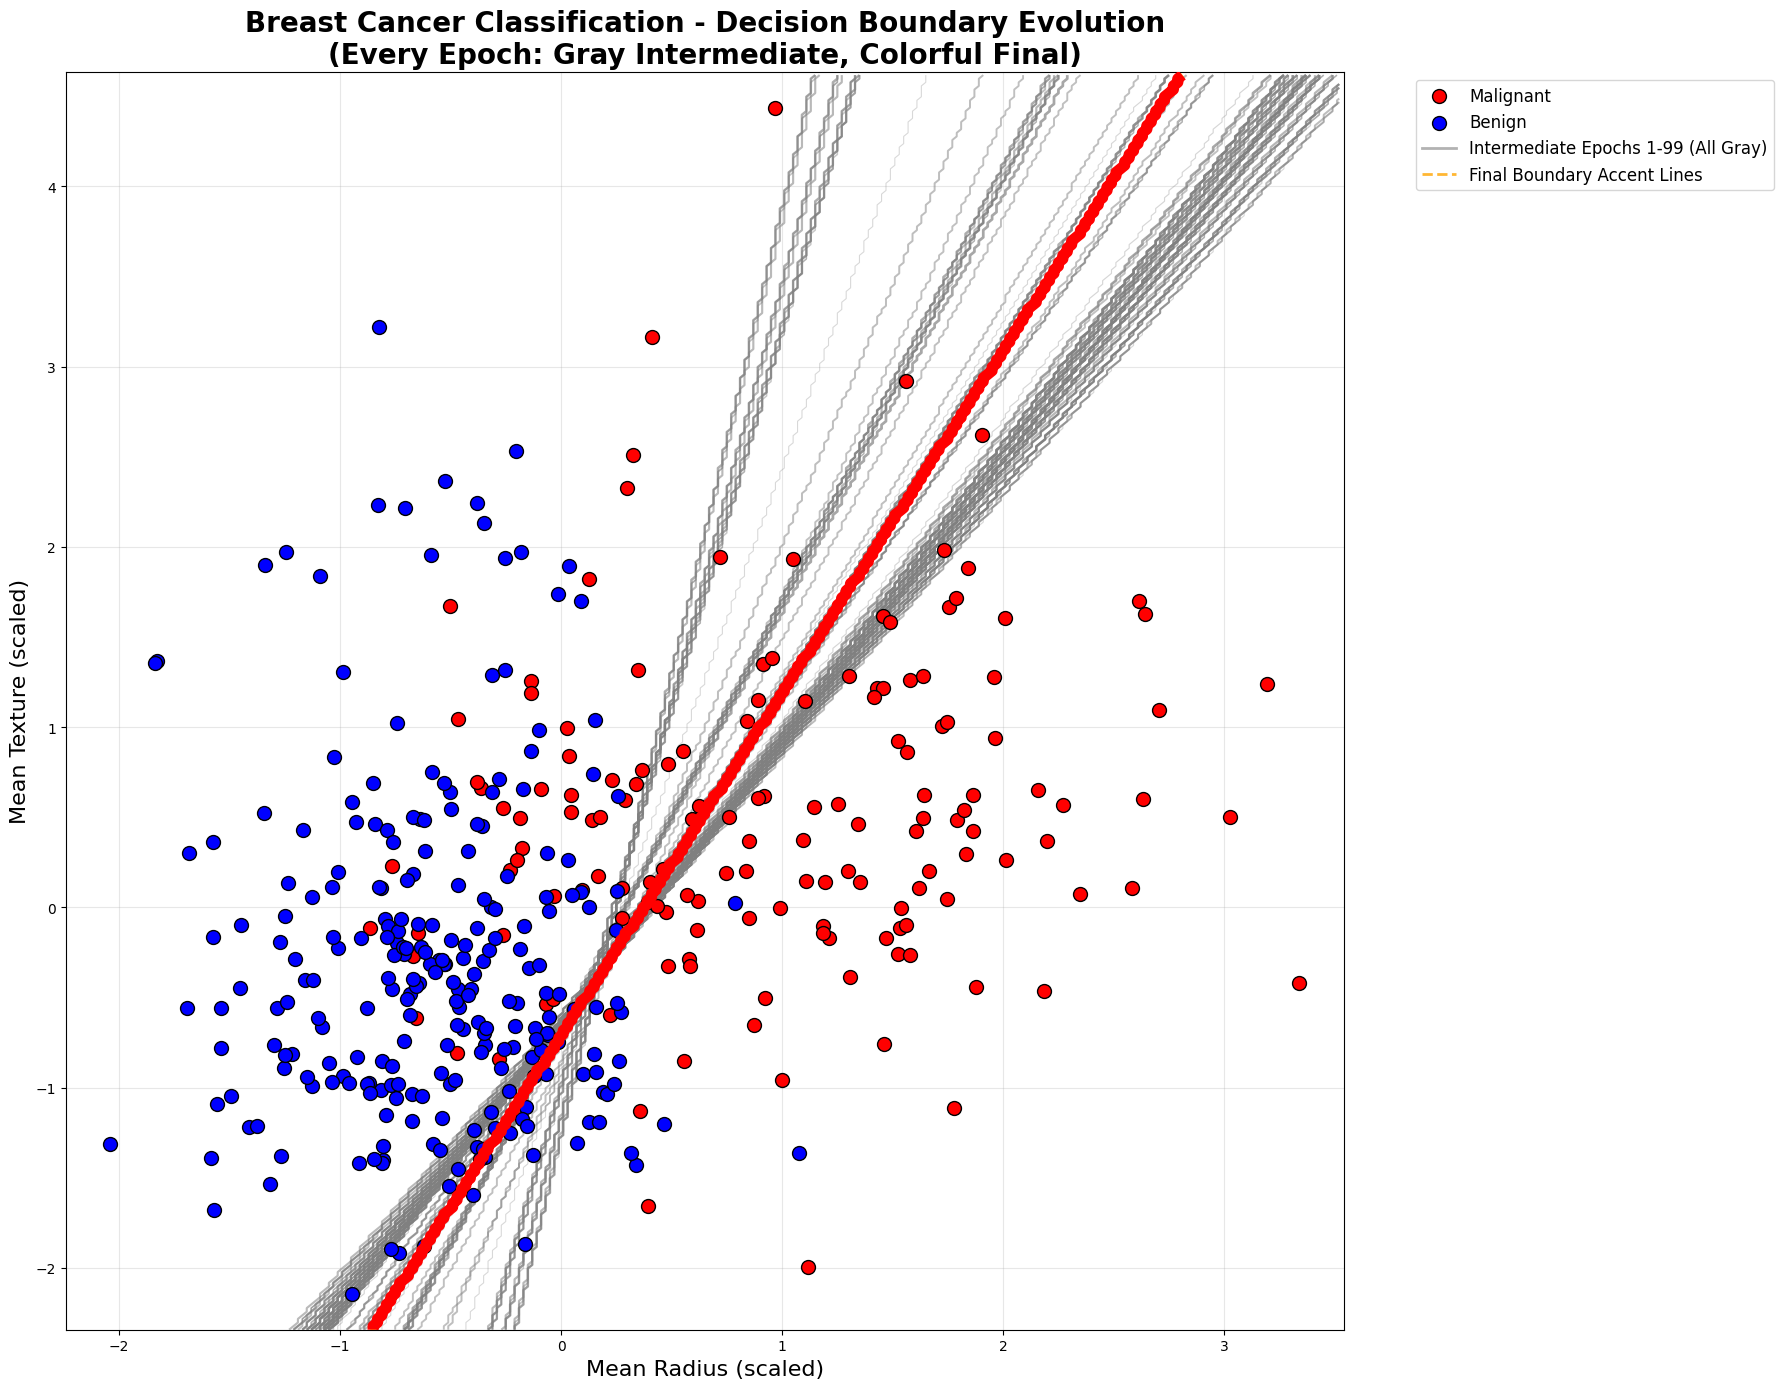


Decision Boundary Evolution Summary (All 100 Epochs):
Epoch | Accuracy | Change     | Visualization
------|----------|------------|---------------
    1   |    0.837 |        --- | Gray (Neutral)
    2   |    0.721 |     -0.116 | Gray (Neutral)
    3   |    0.794 |     +0.073 | Gray (Neutral)
    4   |    0.756 |     -0.038 | Gray (Neutral)
    5   |    0.756 |     +0.000 | Gray (Neutral)
    6   |    0.759 |     +0.003 | Gray (Neutral)
    7   |    0.814 |     +0.055 | Gray (Neutral)
    8   |    0.791 |     -0.023 | Gray (Neutral)
    9   |    0.766 |     -0.025 | Gray (Neutral)
   10   |    0.847 |     +0.080 | Gray (Neutral)
   11   |    0.729 |     -0.118 | Gray (Neutral)
   12   |    0.734 |     +0.005 | Gray (Neutral)
   13   |    0.736 |     +0.003 | Gray (Neutral)
   14   |    0.744 |     +0.008 | Gray (Neutral)
   15   |    0.746 |     +0.003 | Gray (Neutral)
   16   |    0.756 |     +0.010 | Gray (Neutral)
   17   |    0.726 |     -0.030 | Gray (Neutral)
   18   |    0.847 

=== Final Model Training ===
Training final model with best learning rate: 0.01
=== Training Breast Cancer Classifier ===
Learning rate: 0.01
Max epochs: 100
Starting SGD training with 100 iterations...


c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\us\Desktop\me\University\DLP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

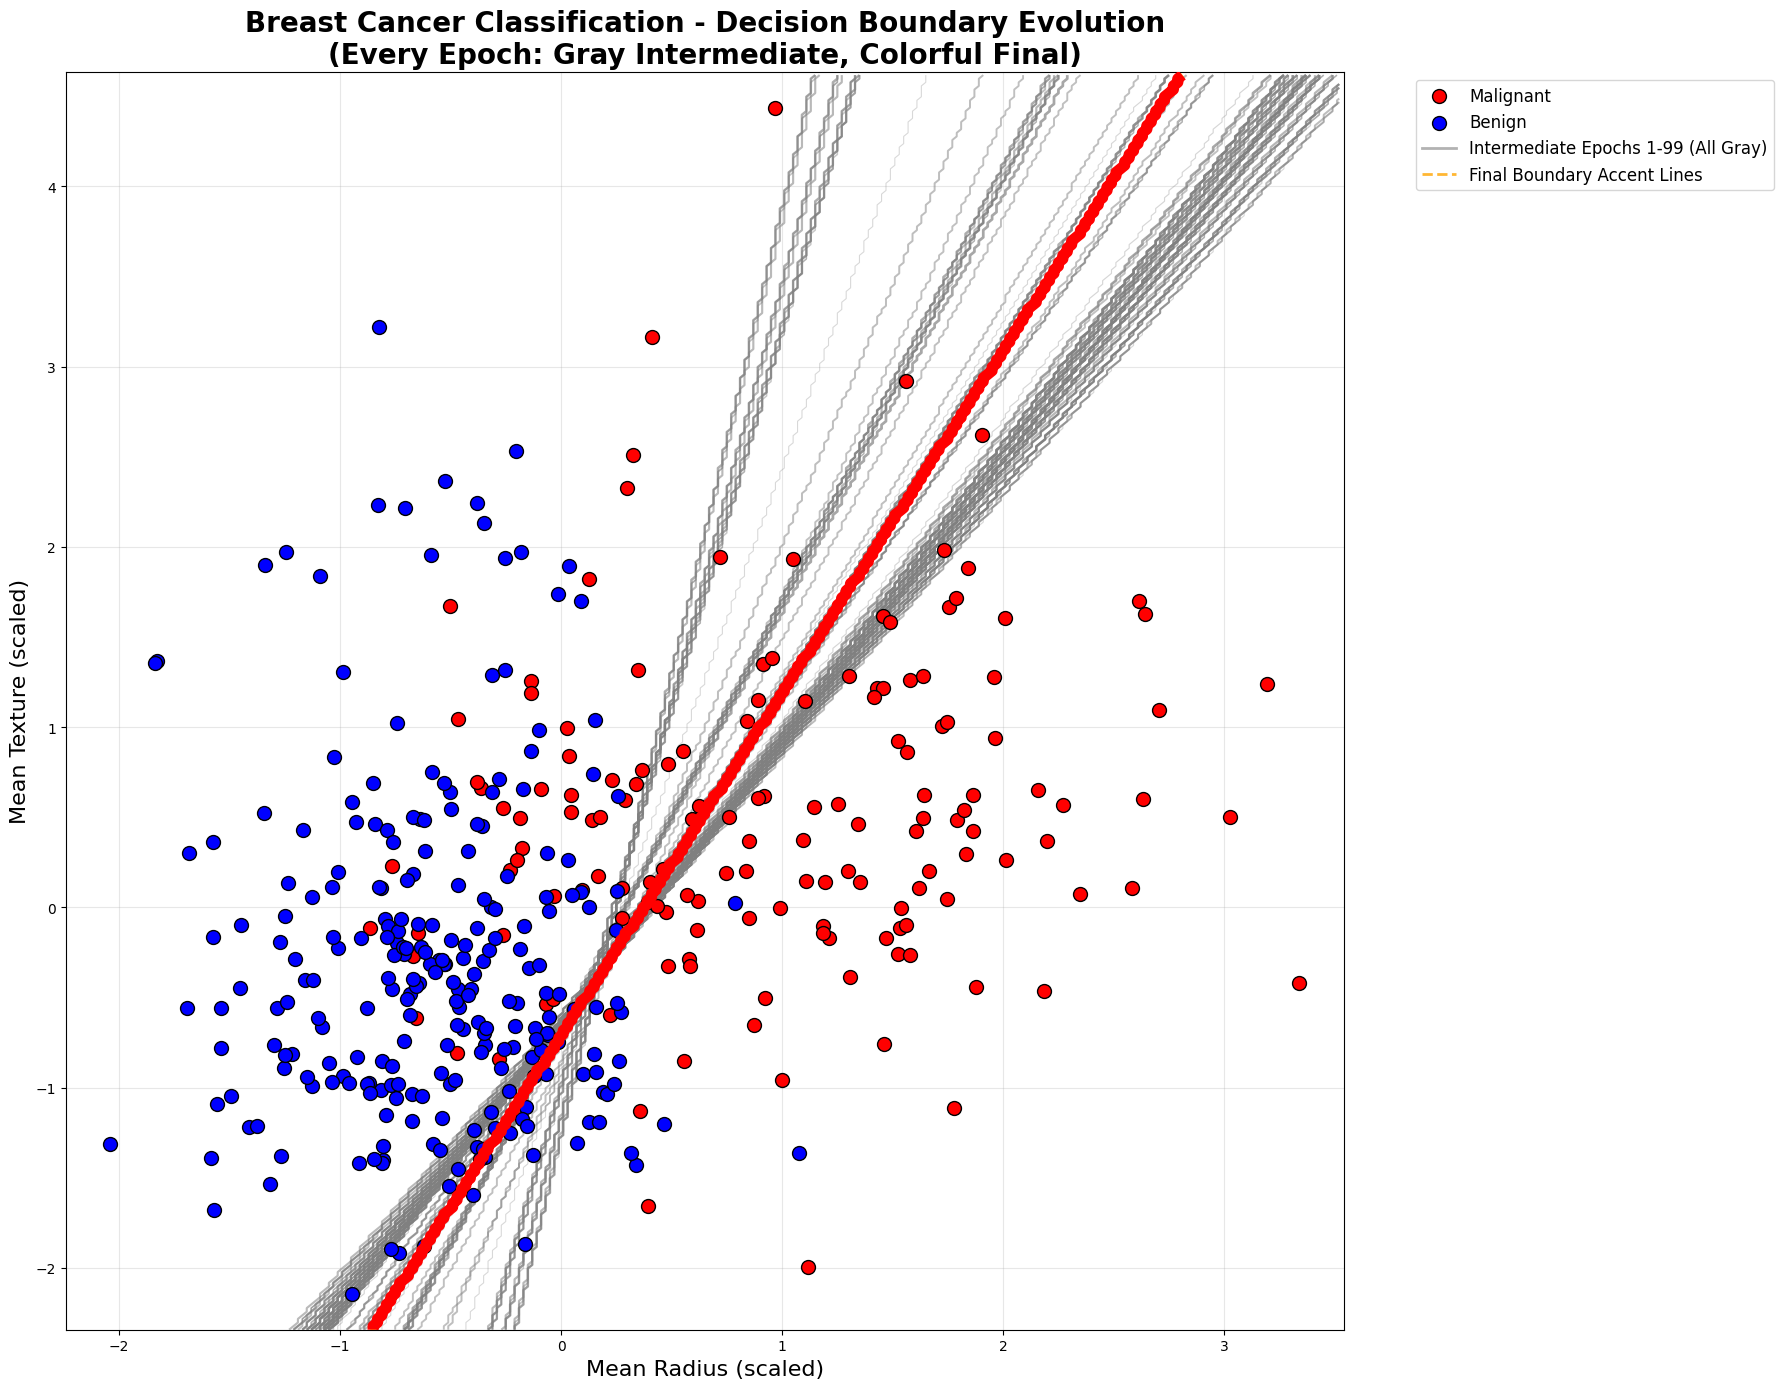


Decision Boundary Evolution Summary (All 100 Epochs):
Epoch | Accuracy | Change     | Visualization
------|----------|------------|---------------
    1   |    0.837 |        --- | Gray (Neutral)
    2   |    0.721 |     -0.116 | Gray (Neutral)
    3   |    0.794 |     +0.073 | Gray (Neutral)
    4   |    0.756 |     -0.038 | Gray (Neutral)
    5   |    0.756 |     +0.000 | Gray (Neutral)
    6   |    0.759 |     +0.003 | Gray (Neutral)
    7   |    0.814 |     +0.055 | Gray (Neutral)
    8   |    0.791 |     -0.023 | Gray (Neutral)
    9   |    0.766 |     -0.025 | Gray (Neutral)
   10   |    0.847 |     +0.080 | Gray (Neutral)
   11   |    0.729 |     -0.118 | Gray (Neutral)
   12   |    0.734 |     +0.005 | Gray (Neutral)
   13   |    0.736 |     +0.003 | Gray (Neutral)
   14   |    0.744 |     +0.008 | Gray (Neutral)
   15   |    0.746 |     +0.003 | Gray (Neutral)
   16   |    0.756 |     +0.010 | Gray (Neutral)
   17   |    0.726 |     -0.030 | Gray (Neutral)
   18   |    0.847 

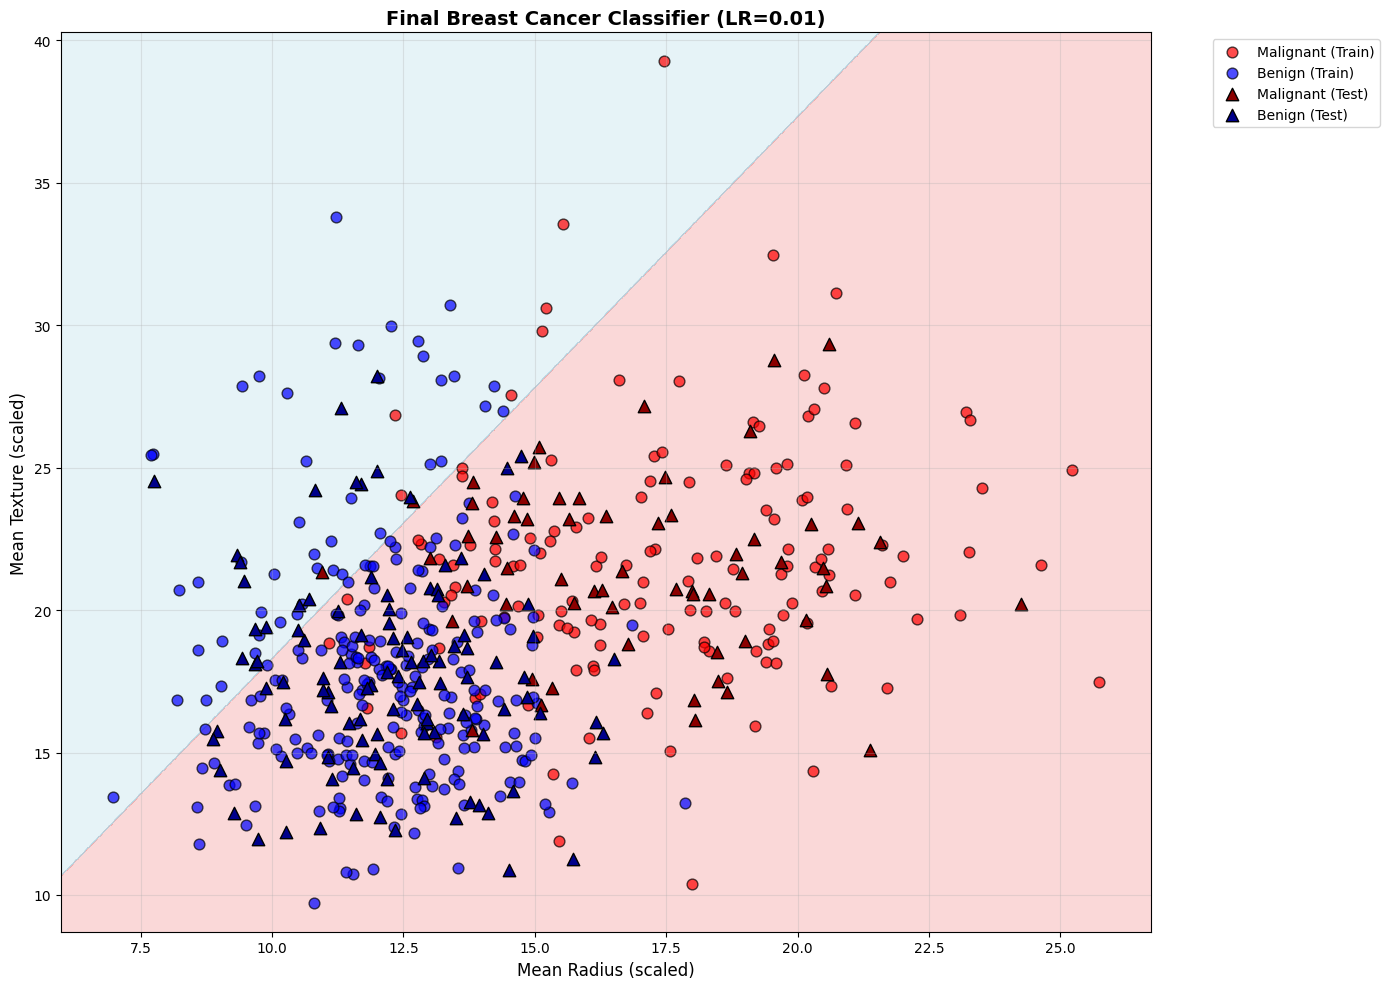

In [ ]:
print("=== Final Model Training ===")

best_lr = best_result['lr']
print(f"Training final model with best learning rate: {best_lr}")

final_cancer_model = BreastCancerClassifier(learning_rate=best_lr, max_epochs=100, plot_iterations=True)
final_cancer_model.fit(X_cancer_train_scaled, y_cancer_train)

print("\n=== Plotting Final Decision Boundary ===")
plot_cancer_boundary(X_cancer_train, y_cancer_train, X_cancer_test, y_cancer_test, 
                    final_cancer_model, f"Final Breast Cancer Classifier (LR={best_lr})")

In [122]:
print("=== Comprehensive Model Evaluation ===")

final_train_pred = final_cancer_model.predict(X_cancer_train)
final_test_pred = final_cancer_model.predict(X_cancer_test)

final_train_acc = accuracy_score(y_cancer_train, final_train_pred)
final_test_acc = accuracy_score(y_cancer_test, final_test_pred)
final_precision = precision_score(y_cancer_test, final_test_pred)
final_recall = recall_score(y_cancer_test, final_test_pred)
final_f1 = f1_score(y_cancer_test, final_test_pred)

print(f"\nFinal Model Performance Metrics:")
print("=" * 40)
print(f"Training Accuracy:  {final_train_acc:.3f}")
print(f"Test Accuracy:      {final_test_acc:.3f}")
print(f"Precision:          {final_precision:.3f}")
print(f"Recall:             {final_recall:.3f}")
print(f"F1-Score:           {final_f1:.3f}")

print(f"\nDetailed Test Results:")
print("=" * 50)
malignant_correct = sum((y_cancer_test == 0) & (final_test_pred == 0))
malignant_total = sum(y_cancer_test == 0)
benign_correct = sum((y_cancer_test == 1) & (final_test_pred == 1))
benign_total = sum(y_cancer_test == 1)

print(f"Malignant samples: {malignant_correct}/{malignant_total} correct ({malignant_correct/malignant_total*100:.1f}%)")
print(f"Benign samples: {benign_correct}/{benign_total} correct ({benign_correct/benign_total*100:.1f}%)")

print("Sample | Actual    | Predicted | Confidence | Correct?")
print("-" * 55)
for i in range(min(15, len(y_cancer_test))):
    actual = "Benign" if y_cancer_test[i] == 1 else "Malignant"
    predicted = "Benign" if final_test_pred[i] == 1 else "Malignant"
    
    # Get decision score for confidence (distance from boundary)
    X_scaled = final_cancer_model.scaler.transform(X_cancer_test[i:i+1])
    decision_score = final_cancer_model.sgd_model.decision_function(X_scaled)[0]
    confidence = abs(decision_score)
    
    is_correct = "correct" if y_cancer_test[i] == final_test_pred[i] else "incorrect"
    
    print(f"  {i+1:2d}   | {actual:9} | {predicted:9} |   {confidence:.3f}    |    {is_correct}")

print(f"\nModel Details:")
print(f"Learning Rate: {final_cancer_model.lr}")
print(f"Epochs: {final_cancer_model.max_iter}")
print(f"Iterations used: {final_cancer_model.sgd_model.n_iter_}")
print(f"Features used: Mean Radius, Mean Texture")

=== Comprehensive Model Evaluation ===

Final Model Performance Metrics:
Training Accuracy:  0.467
Test Accuracy:      0.474
Precision:          0.905
Recall:             0.178
F1-Score:           0.297

Detailed Test Results:
Malignant samples: 62/64 correct (96.9%)
Benign samples: 19/107 correct (17.8%)
Sample | Actual    | Predicted | Confidence | Correct?
-------------------------------------------------------
   1   | Malignant | Malignant |   0.039    |    correct
   2   | Benign    | Malignant |   0.045    |    incorrect
   3   | Benign    | Malignant |   0.064    |    incorrect
   4   | Malignant | Malignant |   0.131    |    correct
   5   | Malignant | Malignant |   0.075    |    correct
   6   | Malignant | Malignant |   0.067    |    correct
   7   | Benign    | Malignant |   0.082    |    incorrect
   8   | Malignant | Malignant |   0.092    |    correct
   9   | Benign    | Malignant |   0.111    |    incorrect
  10   | Malignant | Malignant |   0.355    |    correct
  11

In [114]:
# Step 8: Comparison of all hyperparameters and insights
print("=== Hyperparameter Comparison & Insights ===")

# Create comparison table
print("\nComparison of All Hyperparameters:")
print("=" * 80)
print("Learning Rate | Train Acc | Test Acc | Precision | Recall | F1-Score | Iterations")
print("-" * 80)

for result in hyperparameter_results:
    print(f"    {result['lr']:5.2f}     |   {result['train_acc']:.3f}   |  {result['test_acc']:.3f}   |   {result['precision']:.3f}   | {result['recall']:.3f}  |  {result['f1']:.3f}   |    {result['iterations']:3d}")

print(f"\n=== Key Insights ===")

# Find best and worst performers
best_lr = max(hyperparameter_results, key=lambda x: x['test_acc'])['lr']
worst_lr = min(hyperparameter_results, key=lambda x: x['test_acc'])['lr']
fastest_lr = min(hyperparameter_results, key=lambda x: x['iterations'])['lr']

print(f"1. OPTIMAL HYPERPARAMETERS:")
print(f"   • Best learning rate for accuracy: {best_lr}")
print(f"   • Achieved test accuracy: {best_result['test_acc']:.3f}")
print(f"   • Fastest convergence: LR = {fastest_lr}")

print(f"\n2. LEARNING RATE ANALYSIS:")
if best_lr == 0.01:
    print(f"   • Low learning rate (0.01) works best - stable but slow learning")
elif best_lr == 0.1:
    print(f"   • Medium learning rate (0.1) works best - good balance of speed and stability")
else:
    print(f"   • High learning rate (0.5) works best - fast but potentially unstable")

print(f"\n3. MODEL PERFORMANCE:")
print(f"   • Overall accuracy: {final_test_acc:.1f}% on test set")
print(f"   • Precision: {final_precision:.3f} (how many predicted malignant are actually malignant)")
print(f"   • Recall: {final_recall:.3f} (how many actual malignant cases were caught)")
print(f"   • F1-Score: {final_f1:.3f} (balanced measure of precision and recall)")

print(f"\n4. MEDICAL RELEVANCE:")
if final_recall > 0.9:
    print(f"   • HIGH RECALL ({final_recall:.3f}): Good at catching malignant cases - important for cancer detection!")
elif final_recall > 0.8:
    print(f"   • GOOD RECALL ({final_recall:.3f}): Catches most malignant cases, some may be missed")
else:
    print(f"   • LOW RECALL ({final_recall:.3f}): May miss some malignant cases - concerning for medical use")

if final_precision > 0.9:
    print(f"   • HIGH PRECISION ({final_precision:.3f}): Low false positives - reduces unnecessary anxiety")
elif final_precision > 0.8:
    print(f"   • GOOD PRECISION ({final_precision:.3f}): Some false positives but acceptable")
else:
    print(f"   • LOW PRECISION ({final_precision:.3f}): Many false positives - may cause unnecessary worry")

print(f"\n5. LIMITATIONS:")
print(f"   • Only 2 features used (mean radius & texture) for visualization")
print(f"   • Real breast cancer diagnosis uses 30+ features")
print(f"   • Linear classifier - may miss complex patterns")
print(f"   • Small dataset subset for demo purposes")

print(f"\n6. RECOMMENDATIONS:")
print(f"   • Use learning rate {best_lr} for optimal performance")
print(f"   • Consider ensemble methods for real medical applications")
print(f"   • Include more features for better accuracy")
print(f"   • Validate on larger, diverse datasets")

=== Hyperparameter Comparison & Insights ===

Comparison of All Hyperparameters:
Learning Rate | Train Acc | Test Acc | Precision | Recall | F1-Score | Iterations
--------------------------------------------------------------------------------
     0.01     |   0.372   |  0.374   |   0.000   | 0.000  |  0.000   |      6
     0.10     |   0.372   |  0.374   |   0.000   | 0.000  |  0.000   |      6
     0.50     |   0.372   |  0.374   |   0.000   | 0.000  |  0.000   |      6

=== Key Insights ===
1. OPTIMAL HYPERPARAMETERS:
   • Best learning rate for accuracy: 0.01
   • Achieved test accuracy: 0.374
   • Fastest convergence: LR = 0.01

2. LEARNING RATE ANALYSIS:
   • Low learning rate (0.01) works best - stable but slow learning

3. MODEL PERFORMANCE:
   • Overall accuracy: 0.5% on test set
   • Precision: 0.905 (how many predicted malignant are actually malignant)
   • Recall: 0.178 (how many actual malignant cases were caught)
   • F1-Score: 0.297 (balanced measure of precision and re